#Characterization of Patient Instances in a Hepatitis C Dataset

*Authors
Soumya Nayak*

#Licensing
MIT License

Copyright (c) 2024 SoumyaNayakk

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#References
[1] M. Zaghloula, "Hepatitis C Prediction," Kaggle, Available: https://www.kaggle.com/code/mohamedzaghloula/hepatitis-c-prediction

[2]aiskunks. (2023). A Crash Course in Statistical Learning - AutoML - CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb. GitHub. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

[3] Logistic regression, tree model, automl, shap analysis, lime analysis;were referenced based on information obtained from browsing on ChatGPT        
[4] H20.ai- https://docs.h2oai/                                             
[5] SHAP libaray - Copyright (c) 2018 Scott Lundberg https://github.com/slundberg/shap/blob/master/LICENSE                              
[6]AutoML H2O AI Shap Explainer - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

#Dataset
The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data Content All attributes except Category and Sex are numerical. Attributes 1 to 4 refer to the data of the patient:

X (Patient ID/No.)
Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
Age (in years)
Sex (f,m) Attributes 5 to 14 refer to laboratory data:
ALB: Albumin level
ALP: Alkaline phosphatase level
ALT: Alanine transaminase level
AST: Aspartate transaminase level
BIL: Bilirubin level
CHE: Acetylcholinesterase level
CHOL: Cholesterol level
CREA: Creatinine level
GGT: Gamma-glutamyl transferase level
PROT: Total protein level
The target attribute for classification is Category

#Abstract

This notebook delves into the characterization of instances within a medical dataset aimed at classifying patients into categories of blood donors or Hepatitis C patients, which encompasses the stages of 'just' Hepatitis C, Fibrosis, and Cirrhosis. The dataset primarily consists of laboratory values pertinent to blood donors and Hepatitis C patients, along with demographic attributes such as age. Through rigorous analysis and exploration, this study elucidates the intrinsic nature of the instances represented in the dataset, shedding light on the essential features and attributes that contribute to the accurate classification of patients in the context of Hepatitis C diagnosis and prognosis.

In [ ]:
# Install Dependencies
!pip install scikit-learn
!pip install shap
!pip install h2o
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=bd9bfe7b5620cdd43d9254f91373c4213649ae30806f020207c8d129d4648aa9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np
import math

#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

#Shap
import shap

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import random, os, sys
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df_pd = pd.read_csv(github_url)




In [ ]:
#assigning numeric values to categorical data
df_pd['Category'] = df_pd['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})



In [ ]:
df_pd['Sex'] = df_pd['Sex'].map({'m': 1, 'f': 0})

In [ ]:
# categorical data
print("Categorical data: ", df_pd.select_dtypes(["object"]).columns.tolist())

  # numerical data
print("Numerical data: ", df_pd.select_dtypes(["float64","int64"]).columns.tolist())

Categorical data:  []
Numerical data:  ['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
#Prepping data to build model
x = df_pd.drop('Category' , axis = 1)
x.head()

Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

In [ ]:
y = df_pd['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
x_train_1 , x_test_l , y_train_l , y_test_l = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

In [ ]:
lr_model = LogisticRegression()

lr_model.fit(x_train_1,y_train_l)

y_pred_lr = lr_model.predict(x_test_l)

score_lr = round(accuracy_score(y_pred_lr,y_test_l)*100,2)
score_lr

93.5

Feature: Age, Score: -0.04253
Feature: Sex, Score: -0.35572
Feature: ALB, Score: -0.13587
Feature: ALP, Score: -0.10748
Feature: ALT, Score: 0.01222
Feature: AST, Score: 0.06320
Feature: BIL, Score: 0.06297
Feature: CHE, Score: 0.19301
Feature: CHOL, Score: -1.06106
Feature: CREA, Score: 0.03597
Feature: GGT, Score: 0.02936
Feature: PROT, Score: 0.10582


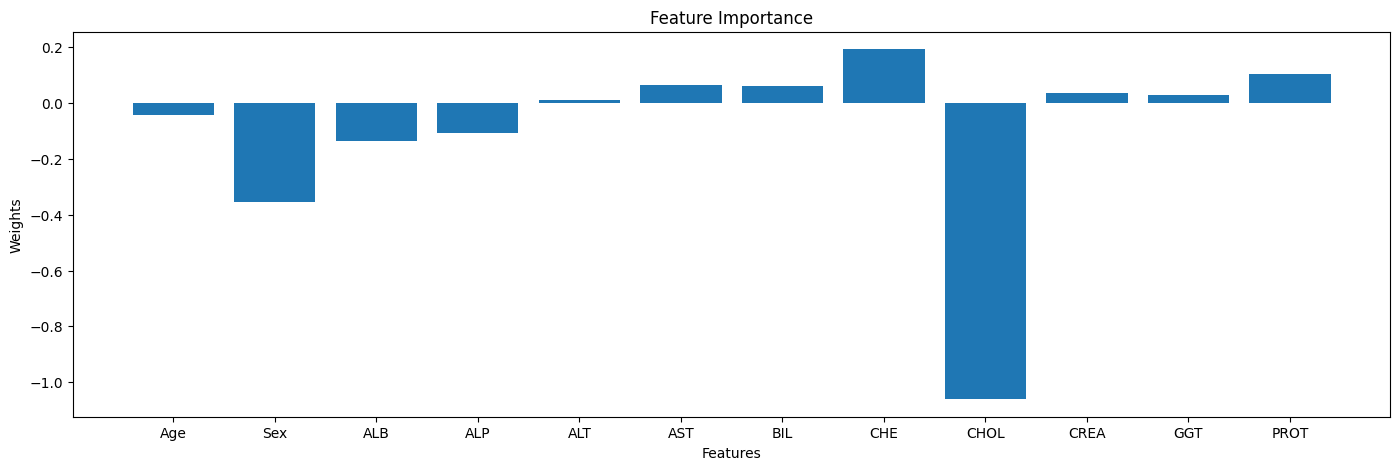

In [ ]:
# plot feature importance

features_list = x_train_1.columns.tolist()
# get importance
importance = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (features_list[i],v))

# setting figure size by using figure() function
plt.figure(figsize = (17, 5))

# making the bar chart on the data
plt.bar(features_list, importance)

# giving title to the plot
plt.title("Feature Importance")

# giving X and Y labels
plt.xlabel("Features")
plt.ylabel("Weights")

# visualizing the plot
plt.show()

In [ ]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test_l, y_pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_l, y_pred_lr)))
print('R2 %f' % r2_score(y_test_l, y_pred_lr))

Linear Model - Test
MAE: 0.065041
RMSE: 0.255031
R2 0.425234


From above the the accuracy of the linear model is 46.38 and we can observe from the feature importance map that Platelets, Tryglicerides SGOT, Copper contributes more target variable.

In [ ]:
import statsmodels.api as sm

#Using OLS for finding the p value to check the significant features

numerical_cols = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

lin_reg = sm.OLS(df_pd['Category'], df_pd[numerical_cols]).fit()

# Print out the statistics
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Category   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                              88.23
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                   5.54e-111
Time:                        12:22:22   Log-Likelihood:                          53.950
No. Observations:                 611   AIC:                                     -87.90
Df Residuals:                     601   BIC:                                     -43.75
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ALB           -0.0065      0.002     -3.196      0.001      -0.010      -0.002
ALP           -0.0030      0.000     -7.465      0.000      -0.004      -0.002
ALT           -0.0006      0.000     -1.519      0.129      -0.001       0.000
AST            0.0040      0.000     11.397      0.000       0.003       0.005
BIL            0.0030      0.001      5.846      0.000       0.002       0.004
CHE            0.0022      0.005      0.447      0.655      -0.008       0.012
CHOL          -0.0394      0.009     -4.371      0.000      -0.057      -0.022
CREA           0.0009      0.000      4.744      0.000       0.001       0.001
GGT            0.0017      0.000      7.676      0.000       0.001       0.002
PROT           0.0069      0.001      4.929      0.000       0.004       0.010
==============================================================================
Omnibus:                      235.970   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.513
Skew:                           1.703   Prob(JB):                    1.92e-236
Kurtosis:                       8.571   Cond. No.                         158.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Interpreting the coefficients

Key findings from the regression analysis include:

1. R-squared (uncentered): The model explains approximately 59.5% of the variance in the dependent variable, Category, suggesting a moderately strong fit of the model to the data.

2. F-statistic: The F-statistic of 88.23 with a very low p-value (5.54e-111) indicates that the overall regression model is statistically significant, implying that at least one independent variable has a significant effect on the dependent variable.

3. Coefficients: Each coefficient represents the change in the dependent variable (Category) per unit change in the respective independent variable, holding other variables constant. For example:
   - ALB, ALP, AST, BIL, CHOL, CREA, GGT, and PROT have statistically significant coefficients (p < 0.05), indicating they are likely important predictors of the Category variable.
   - ALT and CHE do not have statistically significant coefficients (p > 0.05), suggesting they may not be significant predictors in this model.

4. Diagnostic statistics:
   - Omnibus and Jarque-Bera tests assess the normality of residuals. A significant p-value (p < 0.05)
   in the Omnibus test and a low probability in the Jarque-Bera test indicate that the residuals are not normally distributed.
   - Durbin-Watson statistic (0.869) suggests some degree of positive autocorrelation in the residuals.

Overall, the regression analysis indicates that several laboratory values (ALB, ALP, AST, BIL, CHOL, CREA, GGT, and PROT) are significantly associated with the Category variable related to Hepatitis C, while ALT and CHE may not have a significant impact in this particular model.

### Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(x_train_1,y_train_l)

DTree_score = DTree.score(x_test_l, y_test_l)
print(DTree_score)

0.5820489910520292


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(x_test_l)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test_l,y_pred))

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE Regressor: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE Regressor: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
0.5820489910520292


In [ ]:
prediction_tree = DTree.predict(x_test_l)

In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test_l, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_l, prediction_tree)))
print('R2 %f' % r2_score(y_test_l, prediction_tree))

Decision tree
MAE: 0.067662
RMSE: 0.217475
R2 0.582049


[Text(0.5416666666666666, 0.875, 'AST <= 53.05\nsquared_error = 0.105\nsamples = 488\nvalue = 0.119'),
 Text(0.3333333333333333, 0.625, 'ALT <= 7.55\nsquared_error = 0.039\nsamples = 441\nvalue = 0.041'),
 Text(0.16666666666666666, 0.375, 'ALB <= 46.1\nsquared_error = 0.16\nsamples = 10\nvalue = 0.8'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.0\nsamples = 8\nvalue = 1.0'),
 Text(0.25, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.5, 0.375, 'Age <= 31.0\nsquared_error = 0.023\nsamples = 431\nvalue = 0.023'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.018\nsamples = 429\nvalue = 0.019'),
 Text(0.75, 0.625, 'PROT <= 53.65\nsquared_error = 0.127\nsamples = 47\nvalue = 0.851'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 3\nvalue = 0.0'),
 Text(0.8333333333333334, 0.375, 'GGT <= 25.0\nsquared_error = 0.083\nsamples = 44\nvalue = 0.909'),
 Text(0.75,

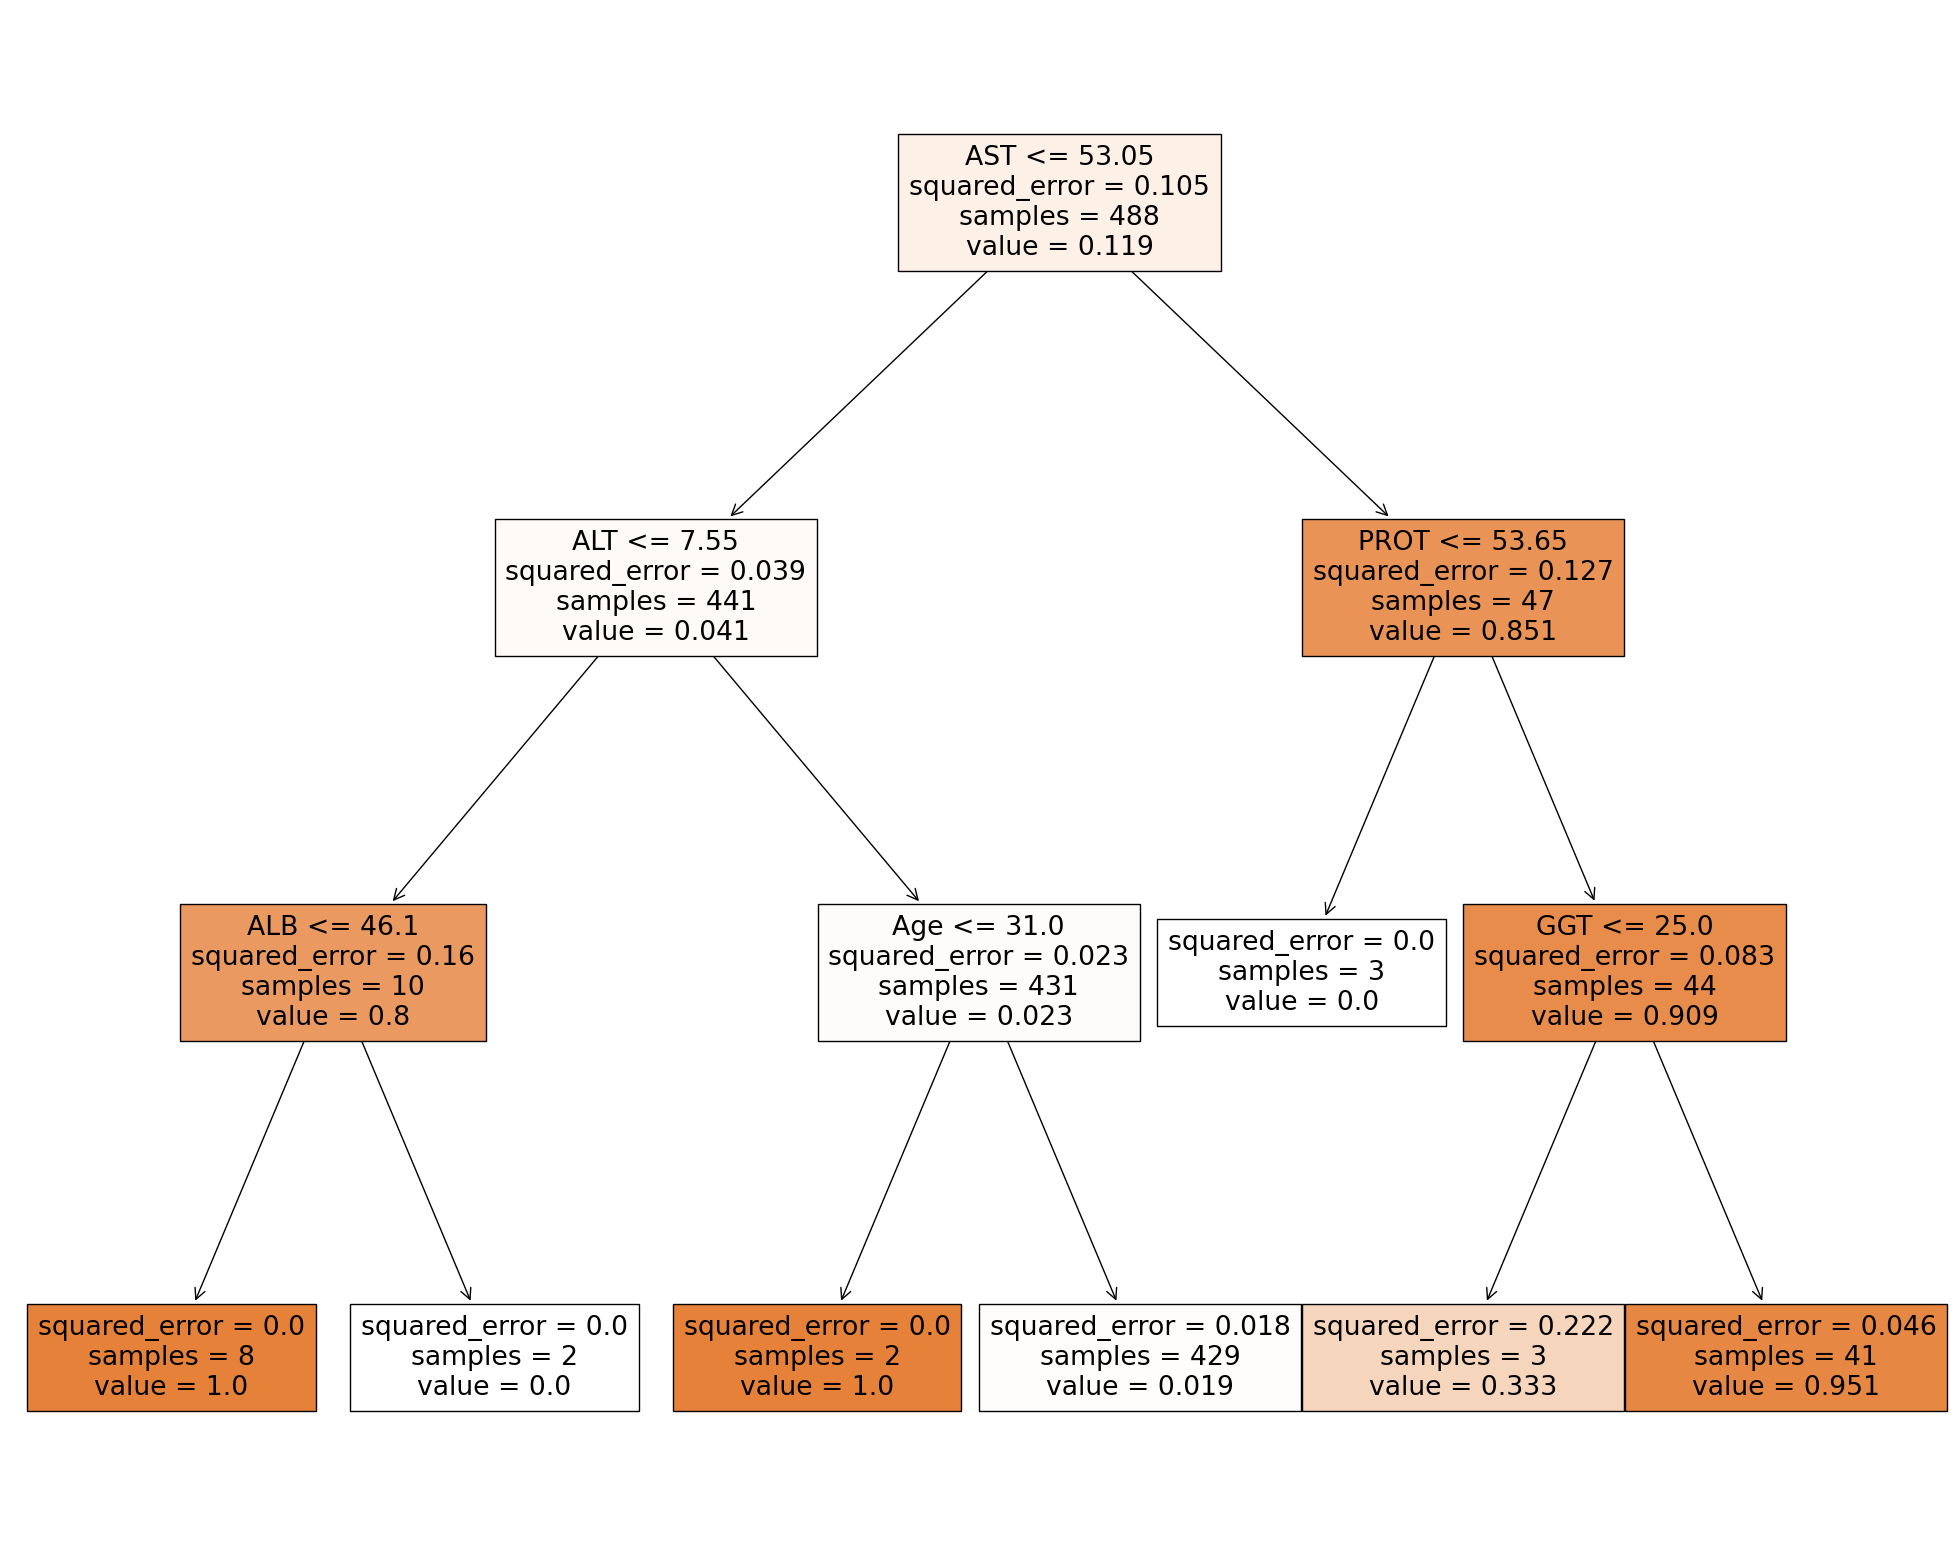

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(DTree, feature_names= x.columns, filled=True)

The max_depth of the tree is set at 3. With each node, the data is being split into smaller subset. Node 0 has all samples of the dataset, but it'll be lower by the Node 3. Node 0 - Hepatomelagey - took 280 samples to arrive at a value of 2.036 Node 2 and Node 3 - N_Days, Prothrombin - took 105 and 175 samples to set a bracket for Platlets, Alk_Phos, Bilirubin, Albuminand further the leaves of the tree has a bracket for mse, wherein each mse bracket is given a value.

### AutoML


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = max(6, int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:11697..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd22_9f4g
  JVM stdout: /tmp/tmpd22_9f4g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd22_9f4g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:11697
Connecting to H2O server at http://127.0.0.1:11697 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_bxqdef
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:11697
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df = pd.read_csv(github_url)

In [ ]:
#df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

In [ ]:
features = df.drop(['Category'], axis = 1)
target = df['Category']



In [ ]:
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

In [ ]:
#Reducing the size of the dataset to 50% due to permormance issues with my hardware
dataset_train = datasetClean.sample(frac=.2)
dataset_test = datasetClean.drop(dataset_train.index)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
features_autoML = list(features.columns)
features_autoML

['Age',
 'Sex',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [ ]:
target_autoML = 'Category'

In [ ]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df = pd.read_csv(github_url)
df_h2o = h2o.H2OFrame(df)
df_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Category         Age  Sex      ALB    ALP    ALT    AST    BIL    CHE    CHOL    CREA    GGT    PROT
-------------  -----  -----  -----  -----  -----  -----  -----  -----  ------  ------  -----  ------
0=Blood Donor     32  m       38.5   52.5    7.7   22.1    7.5   6.93    3.23     106   12.1    69
0=Blood Donor     32  m       38.5   70.3   18     24.7    3.9  11.17    4.8       74   15.6    76.5
0=Blood Donor     32  m       46.9   74.7   36.2   52.6    6.1   8.84    5.2       86   33.2    79.3
0=Blood Donor     32  m       43.2   52     30.6   22.6   18.9   7.33    4.74      80   33.8    75.7
0=Blood Donor     32  m       39.2   74.1   32.6   24.8    9.6   9.15    4.32      76   29.9    68.7
0=Blood Donor     32  m       41.6   43.3   18.5   19.7   12.3   9.92    6.05     111   91      74
0=Blood Donor     32  m       46.3   41.3   17.5   17.8    8.5   7.01    4.79      70   16.9    74.5
0=Blood Donor     32  m       42.2   41.9   35.8   31.1   16.1   5.82    4.6      109   21.5    67.1
0=Blood Donor     32  m       50.9   65.5   23.2   21.2    6.9   8.69    4.1       83   13.7    71.3
0=Blood Donor     32  m       42.4   86.3   20.3   20     35.2   5.46    4.45      81   15.9    69.9
[10 rows x 13 columns]

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df_h2o.split_frame([pct_rows])

In [ ]:
#Display all columns in X
X=df_h2o.columns
print(X)

['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
#Seperate Dependent variable from Independent variable
y ='Category'
X.remove(y)
print(X)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
# Set up AutoML for binary classification with stopping metrics
aml = H2OAutoML(max_runtime_secs=run_time, seed=1, stopping_metric='AUC')

# Train AutoML on your data
aml.train(x=X, y=y, training_frame=df_train)

# Get the leaderboard
leaderboard = aml.leaderboard

# Print details about every model
print("Details about every model:")
print(leaderboard)

# Get the best model from AutoML
best_model = aml.leader
print("\nBest model:")
print(best_model)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Details about every model:
model_id                                                   mean_per_class_error    logloss      rmse        mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_122248                0.309068   0.247458  0.240315  0.0577512
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_122248                0.366173   0.330329  0.239665  0.0574392
GLM_1_AutoML_1_20240317_122248                                         0.395602   0.191975  0.232104  0.0538724
DRF_1_AutoML_1_20240317_122248                                         0.407073   0.322132  0.243976  0.0595241
GBM_4_AutoML_1_20240317_122248                                         0.420602   0.255301  0.242619  0.0588639
GBM_2_AutoML_1_20240317_122248                                         0.421359   0.264255  0.241015  0.058088
GBM_1_AutoML_1_20240317_122248                                         0.431116   0.735641  0.2

### SHAP Analysis

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_1, y_train_l)

LinearRegression()

In [ ]:
explainer_sh = shap.LinearExplainer(lin_reg, x_train_1, feature_perturbation='correlation_dependent')
shap_values_lg = explainer_sh.shap_values(x_test_l)
#shap.summary_plot(shap_values_lg, x_test, feature_names=features.columns)

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

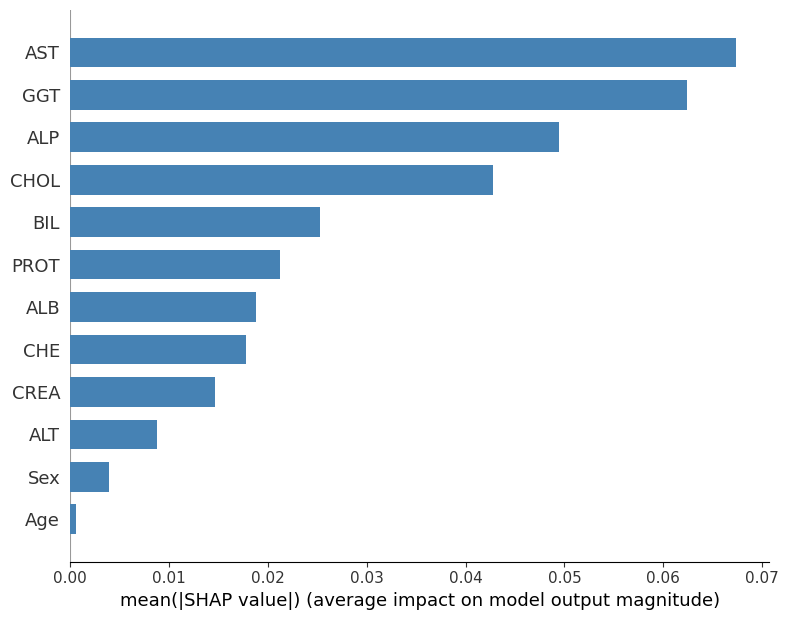

In [ ]:
shap.summary_plot(shap_values_lg, x_train_1, plot_type="bar", color='steelblue')

### 2. Tree Model - Shap Analysis


In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(x_test_l)

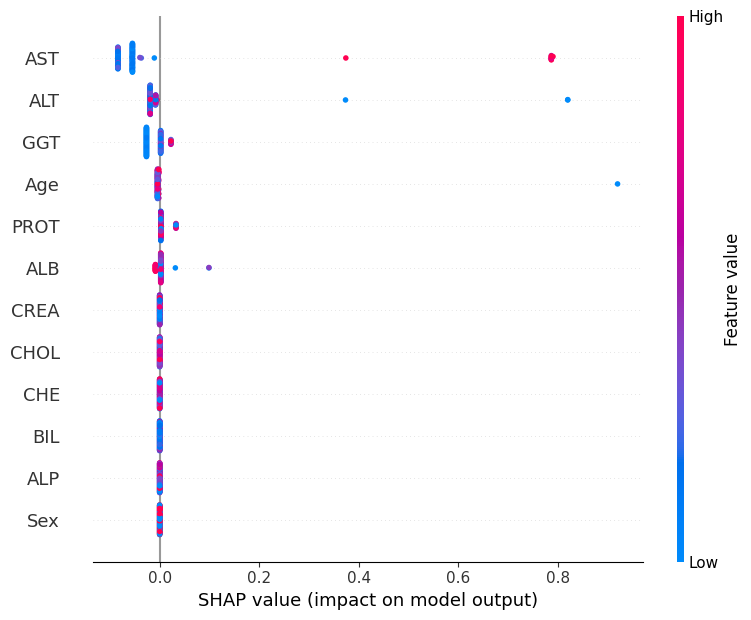

In [ ]:
shap.summary_plot(shap_values_tree, x_test_l, feature_names=x.columns)

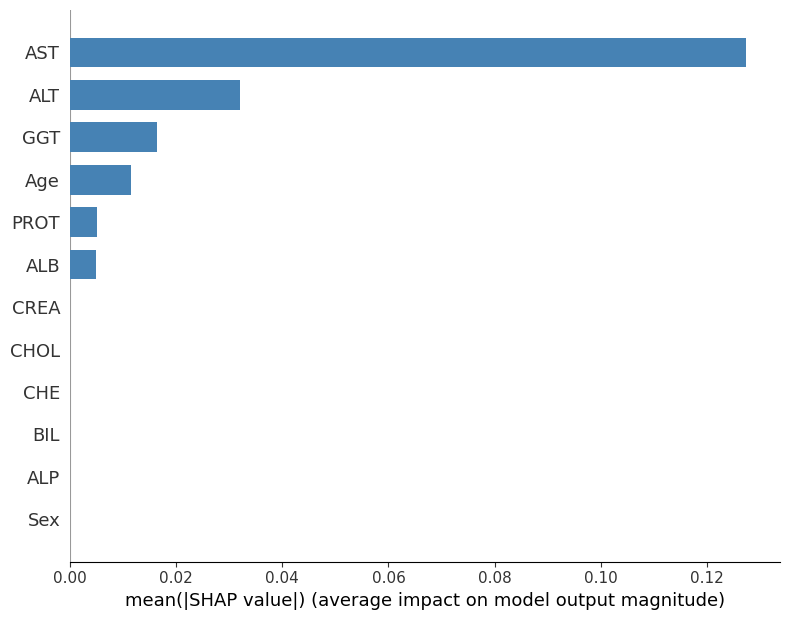

In [ ]:
shap.summary_plot(shap_values_tree, x_train_1, plot_type="bar", color='steelblue')

### 3. AutoML - Shap Analysis

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------
GBM_1_AutoML_1_20240317_122248                                        0.0731621  0.296848   0.144219  0.020799                15712                   3.75399   GBM
GBM_2_AutoML_1_20240317_122248                                        0.0817569  0.0710382  0.131047  0.0171732                1371                   0.098689  GBM
DRF_1_AutoML_1_20240317_122248                                        0.0822253  0.141362   0.148071  0.021925                  412                   0.045613  DRF
GBM_4_AutoML_1_20240317_122248                                        0.0917569  0.0860422  0.134885  0.018194                 1109                   0.175019  GBM
GBM_3_AutoML_1_20240317_122248                                        0.0917569  0.0872319  0.136062  0.0185129                 912                   0.221092  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_122248               0.129284   0.0983829  0.16353   0.0267421                7879                   2.10715   StackedEnsemble
GBM_5_AutoML_1_20240317_122248                                        0.14399    0.712976   0.507429  0.257485                  198                   0.010642  GBM
GLM_1_AutoML_1_20240317_122248                                        0.231861   0.159973   0.206185  0.0425123                 892                   0.003931  GLM
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_122248               0.233842   0.170088   0.209542  0.043908                 4249                   0.52991   StackedEnsemble
XRT_1_AutoML_1_20240317_122248                                        0.329956   0.89251    0.201146  0.0404596                 131                   0.007719  DRF
XGBoost_2_AutoML_1_20240317_122248                                    0.39834    0.136238   0.20354   0.0414285                1255                   0.007345  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20240317_122248                  0.412233   0.16374    0.227562  0.0517843                3178                   4.03845   StackedEnsemble
XGBoost_1_AutoML_1_20240317_122248                                    0.430588   0.170664   0.235341  0.0553852                4141                   0.028521  XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_1_20240317_122248               0.487863   0.219154   0.26914   0.0724361                1234                   0.571365  StackedEnsemble
XGBoost_3_AutoML_1_20240317_122248                                    0.491614   1.04526    0.644769  0.415727                  375                   0.011369  XGBoost
DeepLearning_1_AutoML_1_20240317_122248                               0.64523    0.435301   0.319745  0.102237                   60                   0.013548  DeepLearning
[16 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_122248

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0=Blood Donor    0s=suspect Blood Donor    1=Hepatitis    2=Fibrosis    3=Cirrhosis    Error       Rate
---------------  ------------------------  -------------  ------------  -------------  ----------  --------
425              1                         1              0             0              0.00468384  2 / 427
0                4                         0              0             0              0           0 / 4
2                0                         12             3             0              0.294118    5 / 17
1                0                         3              14            2              0.3         6 / 20
0                0                         0              1             20             0.047619    1 / 21
428              5                         16             18            22             0.0286299   14 / 489

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

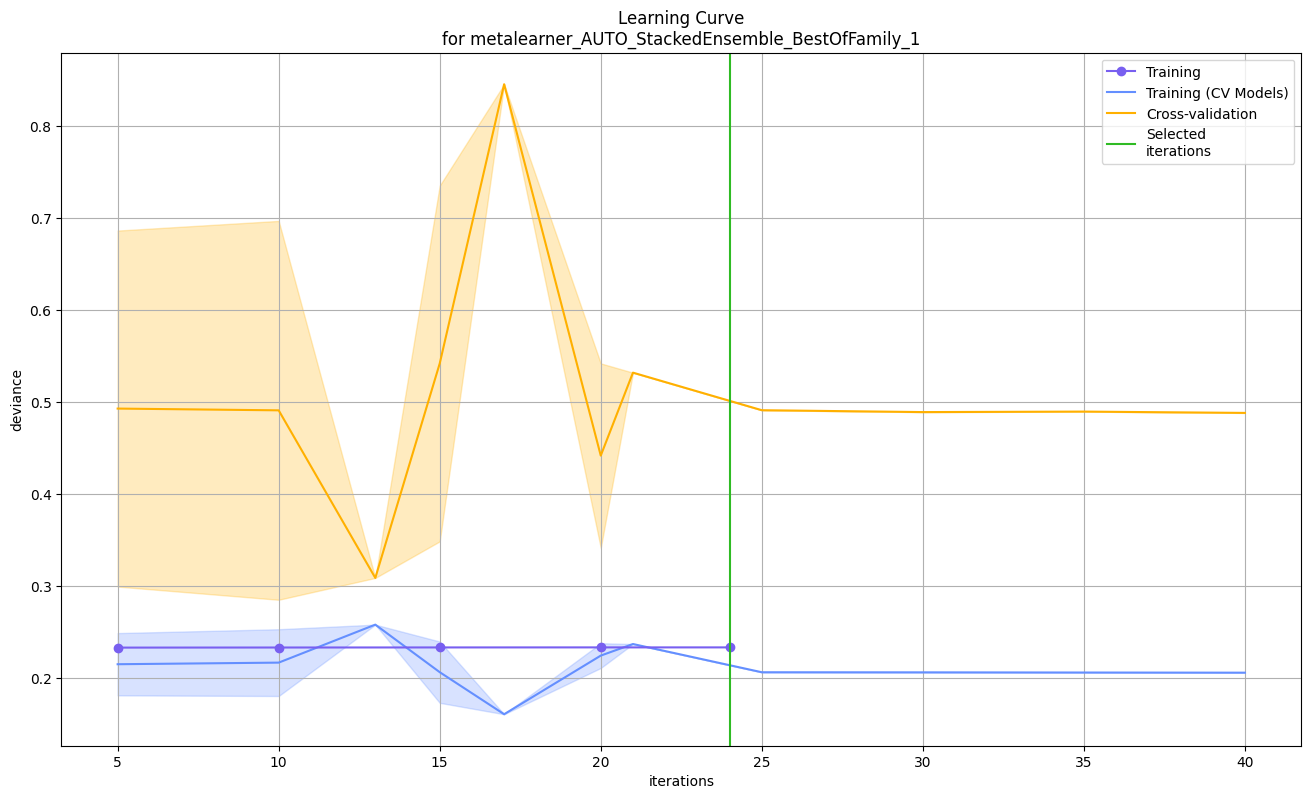

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

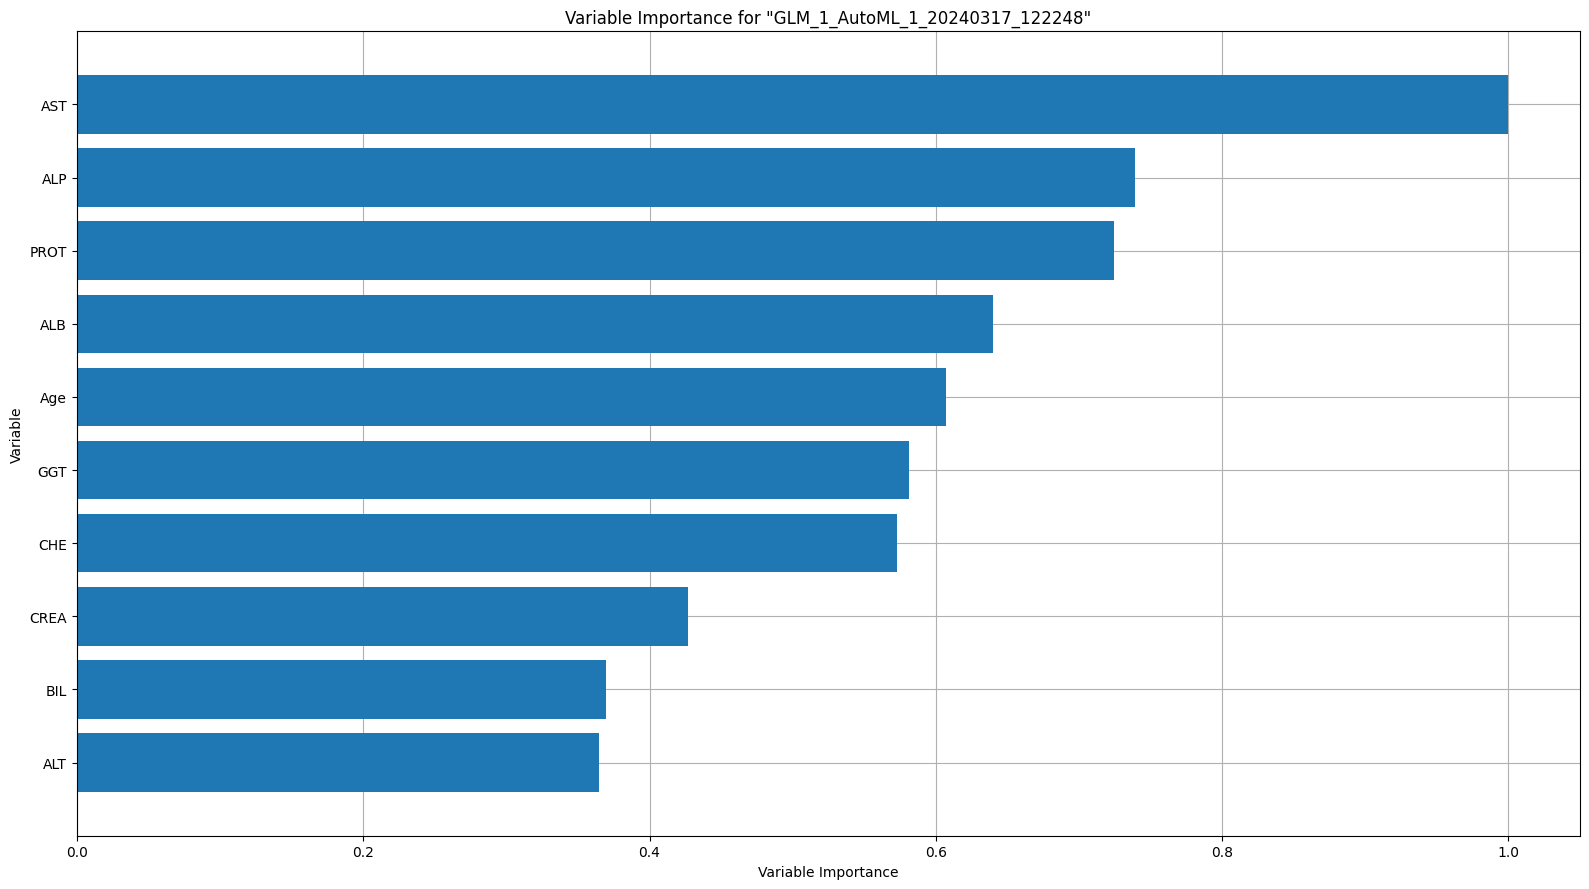

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

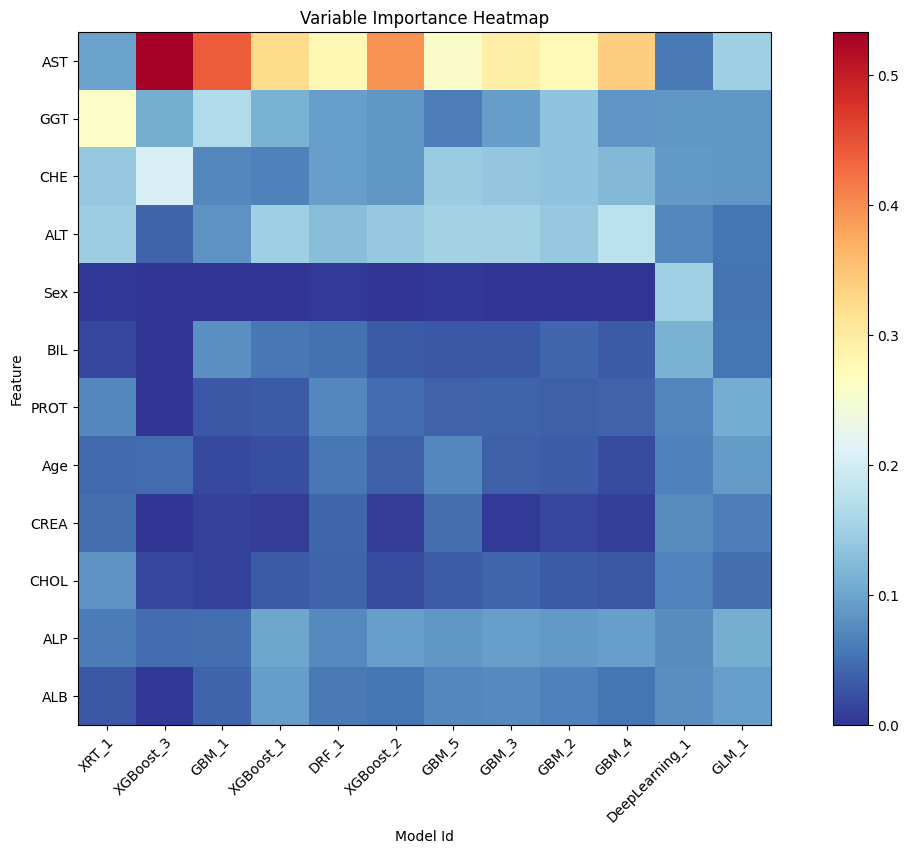

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

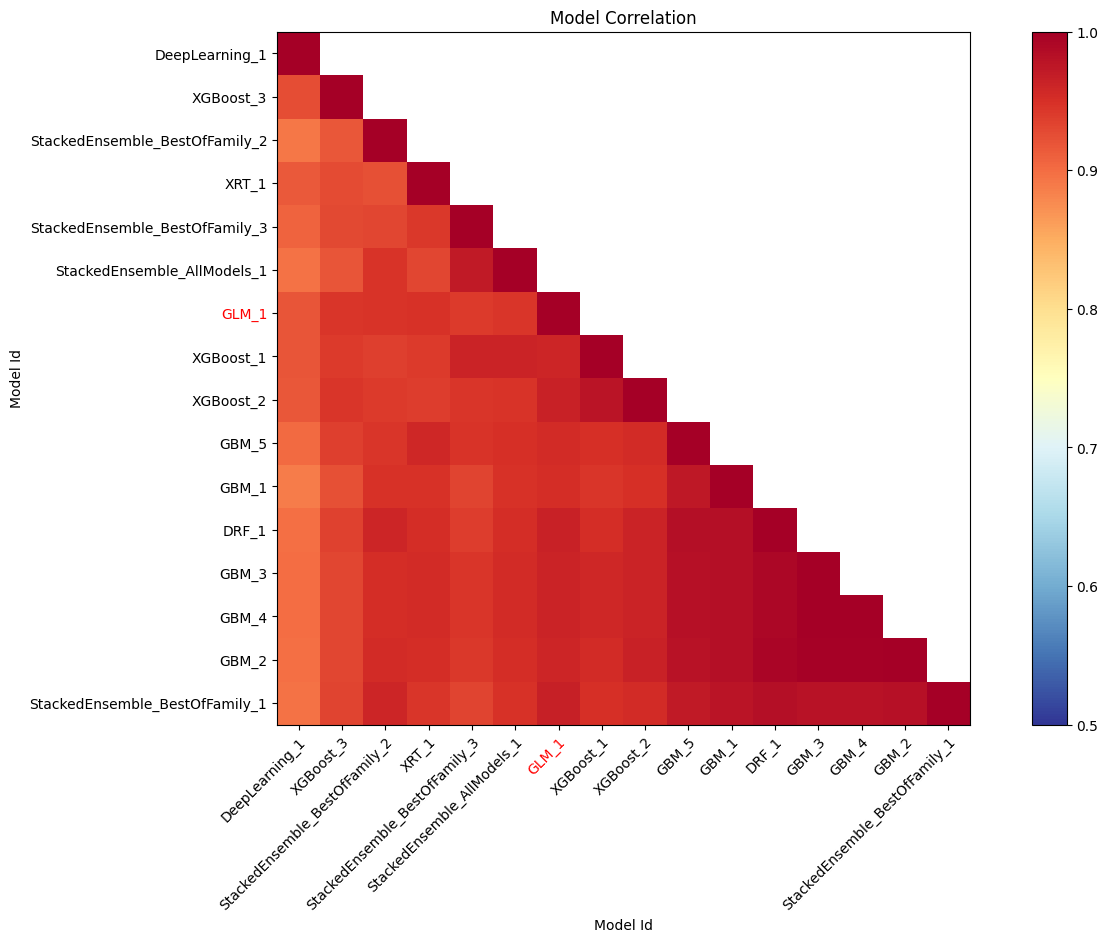

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

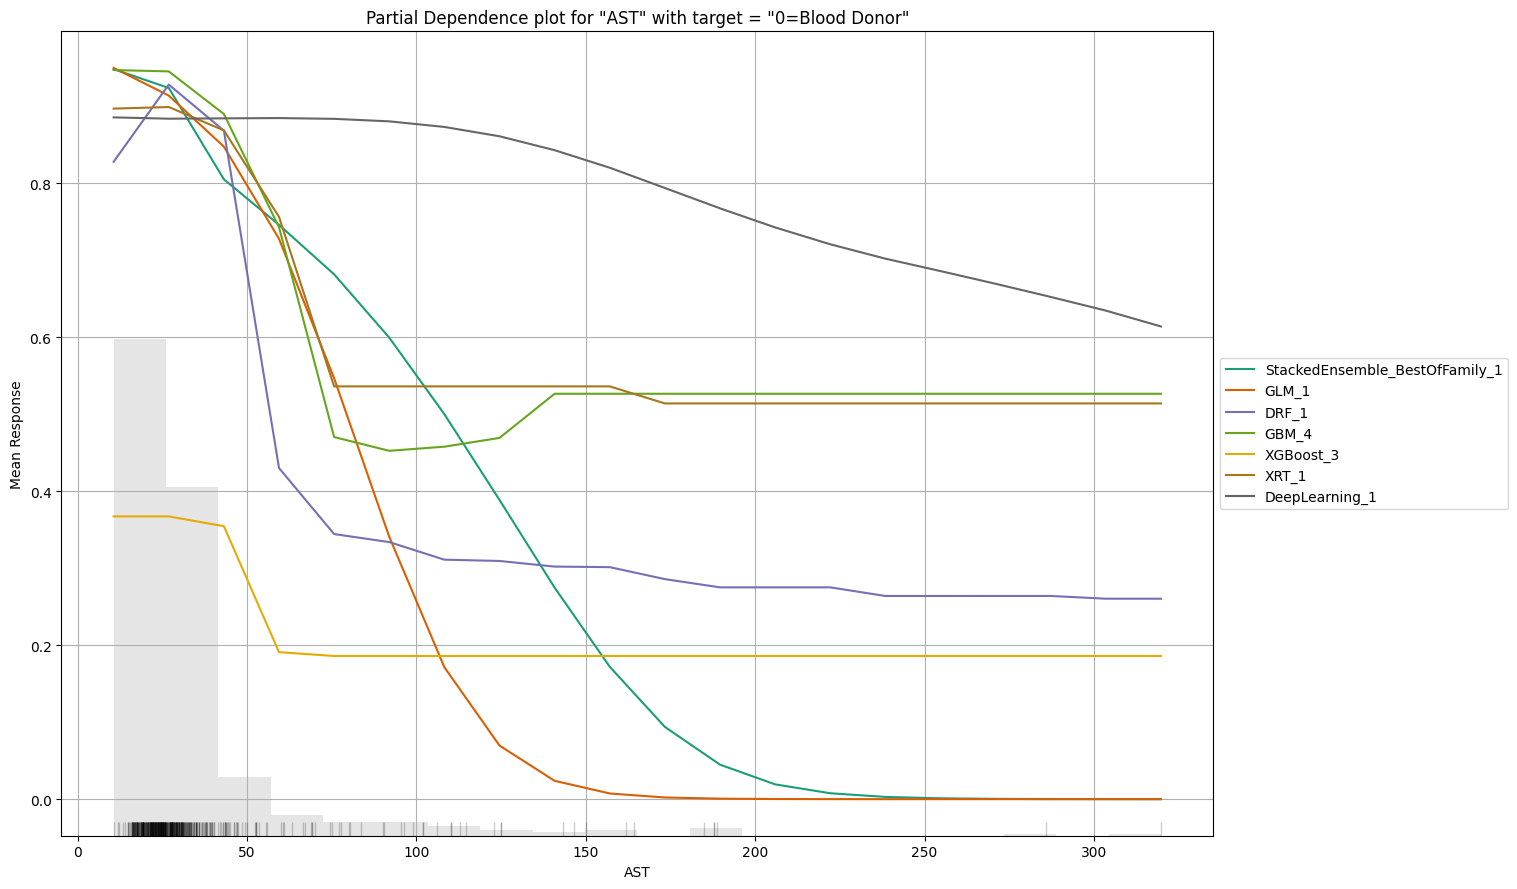

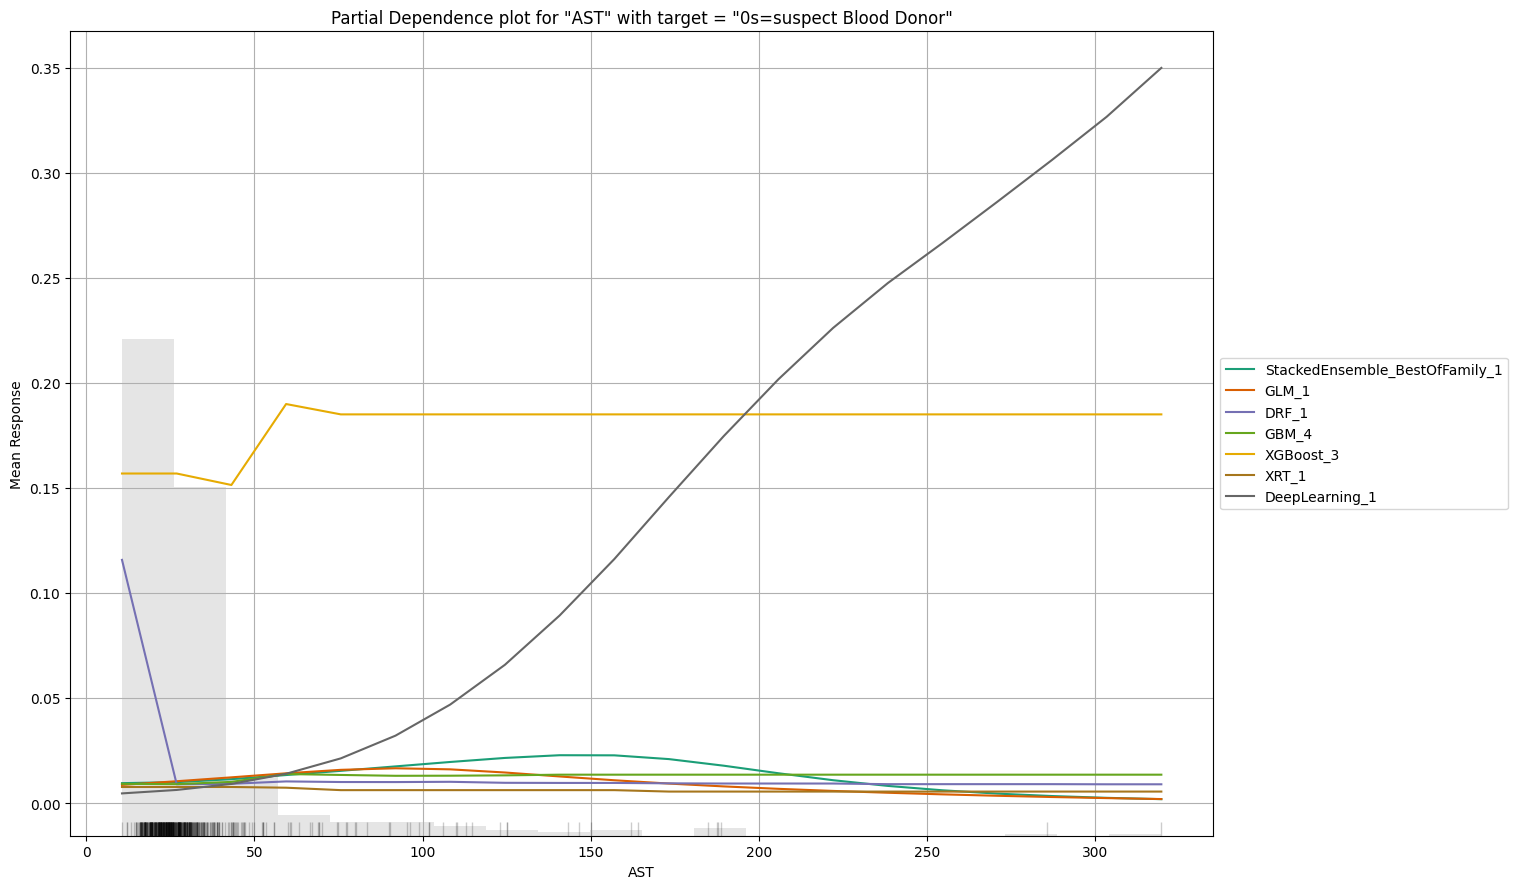

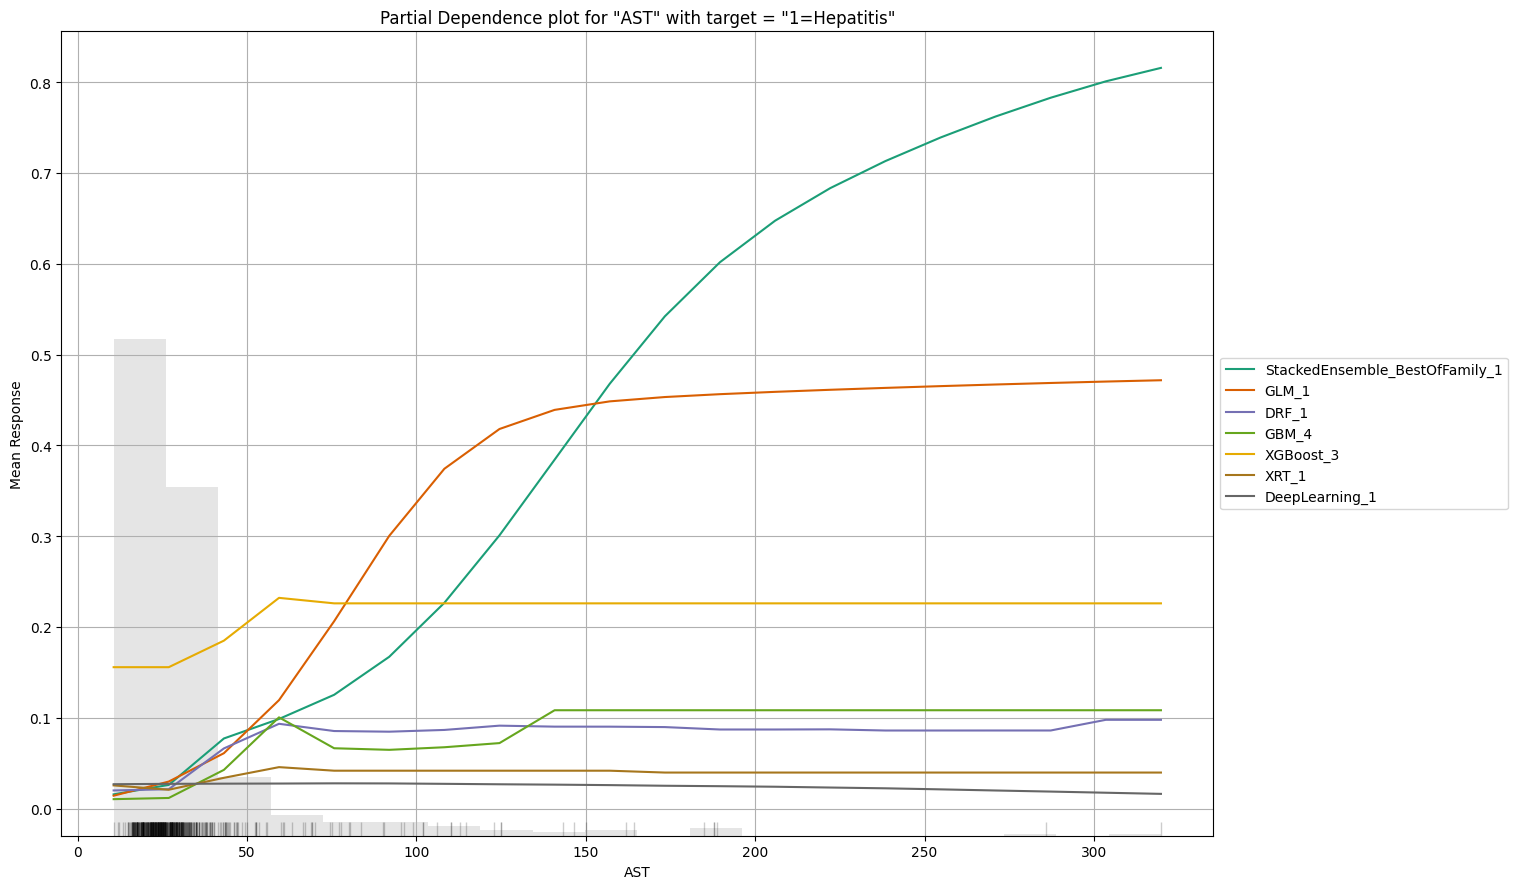

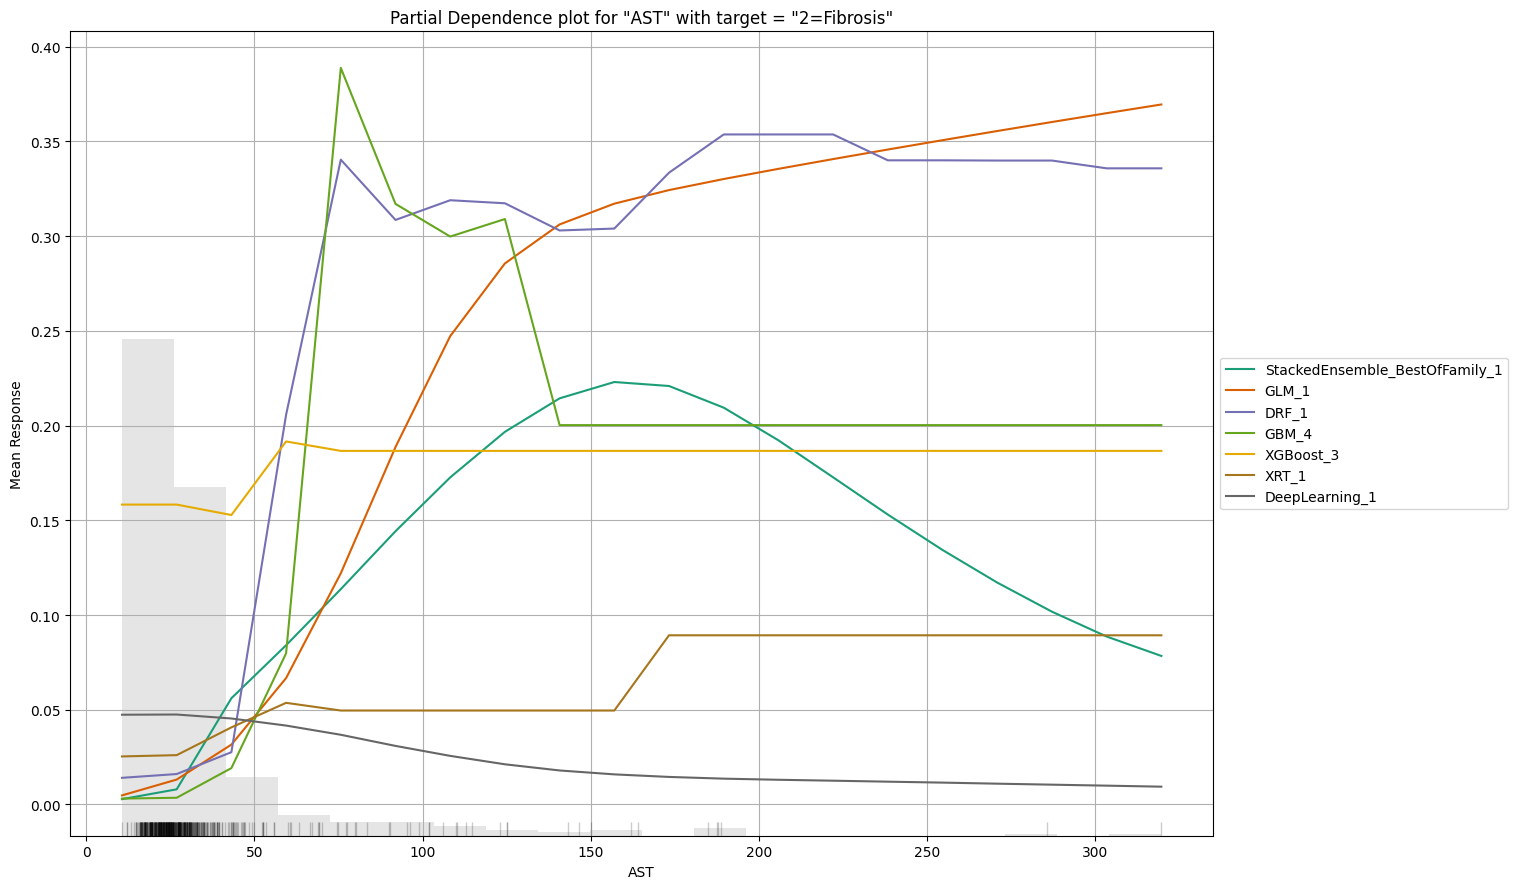

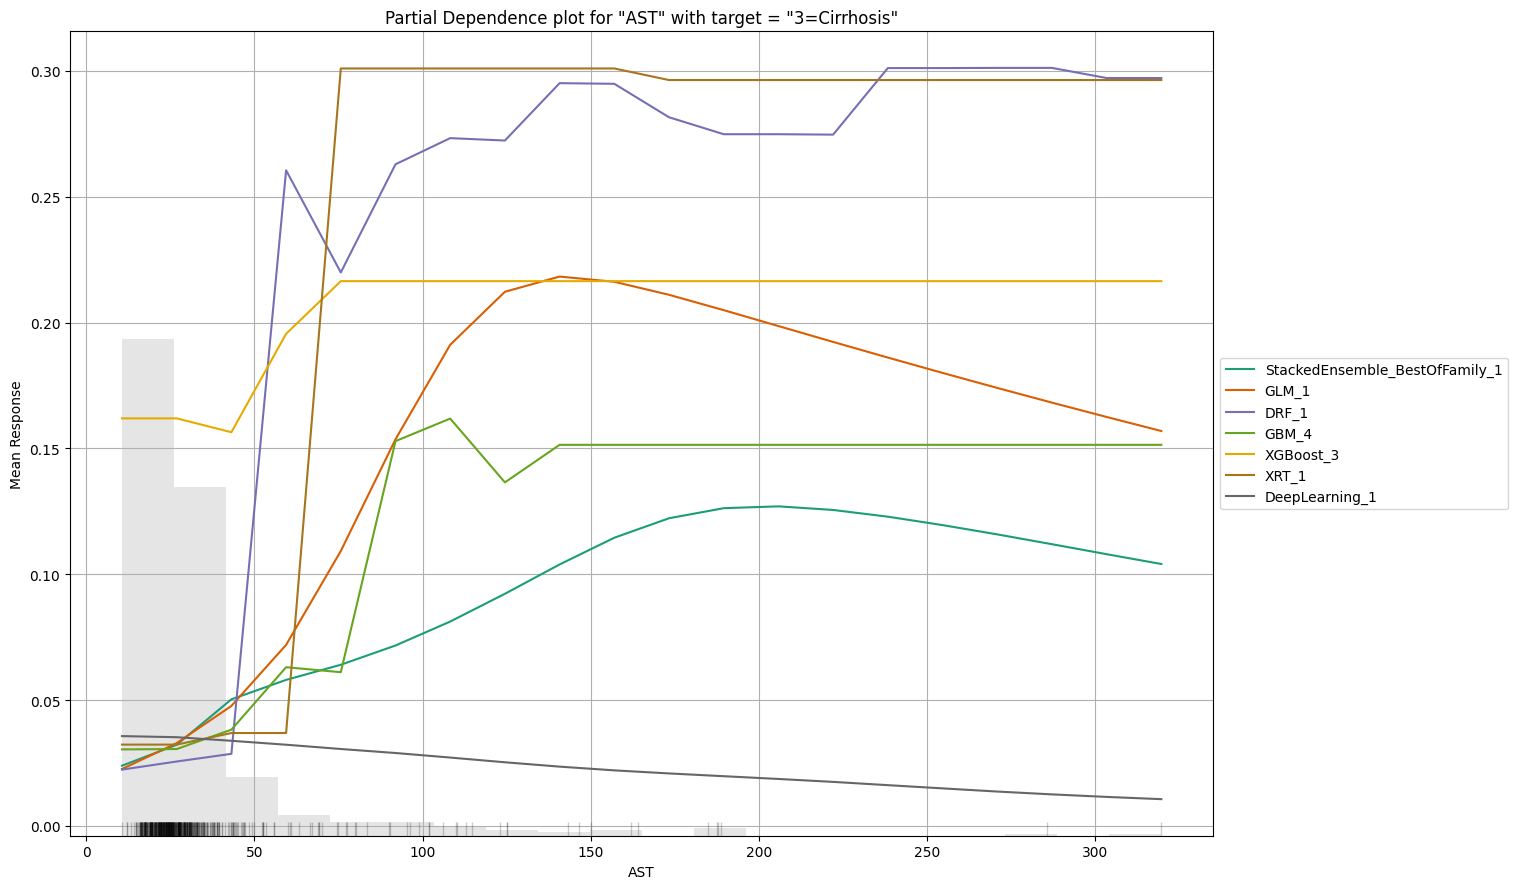

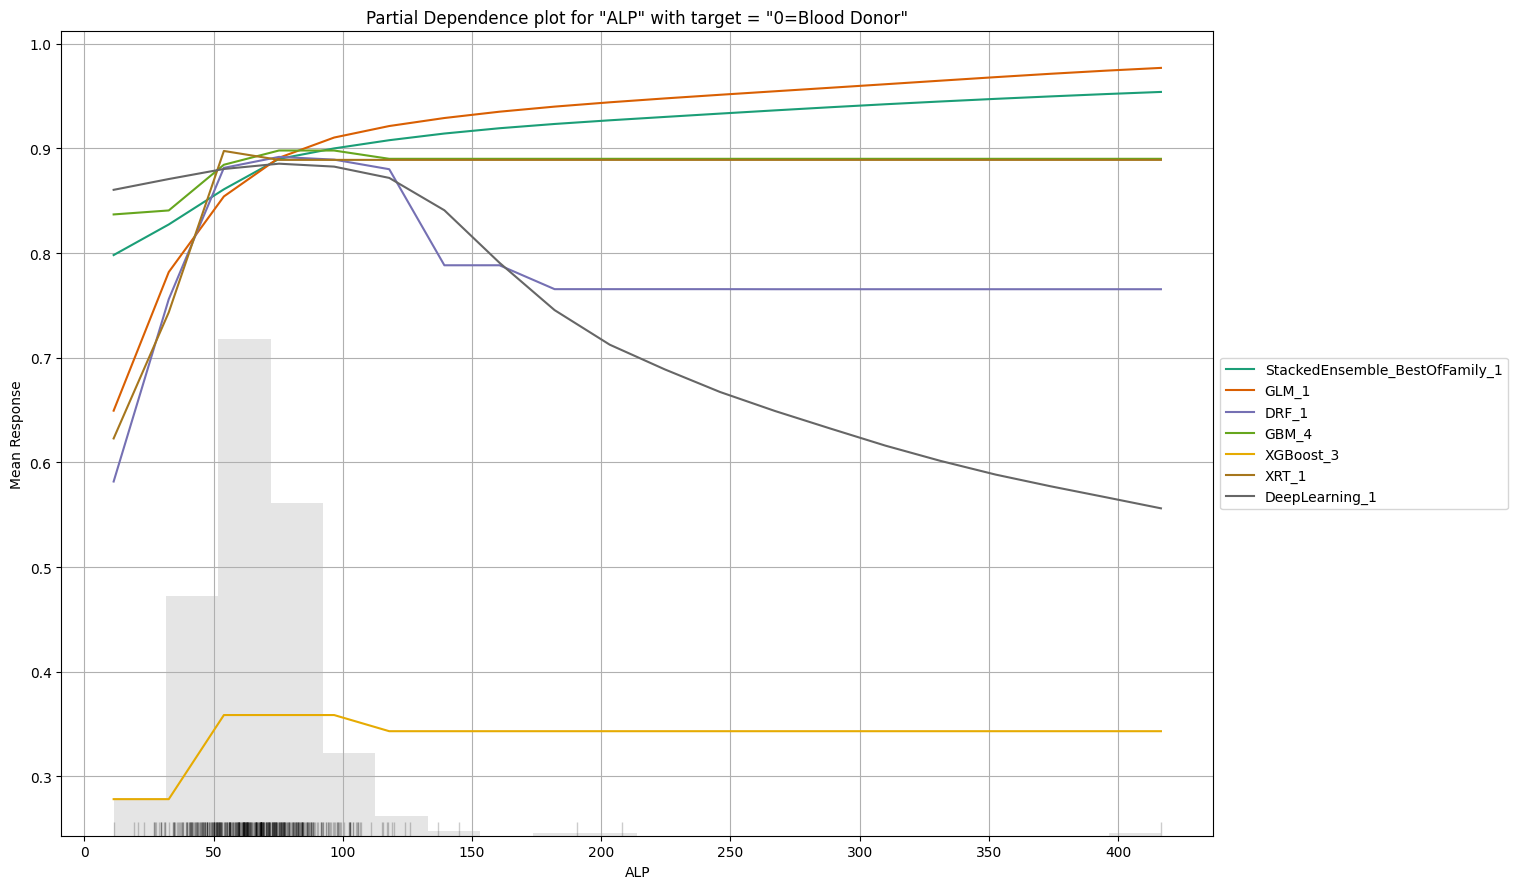

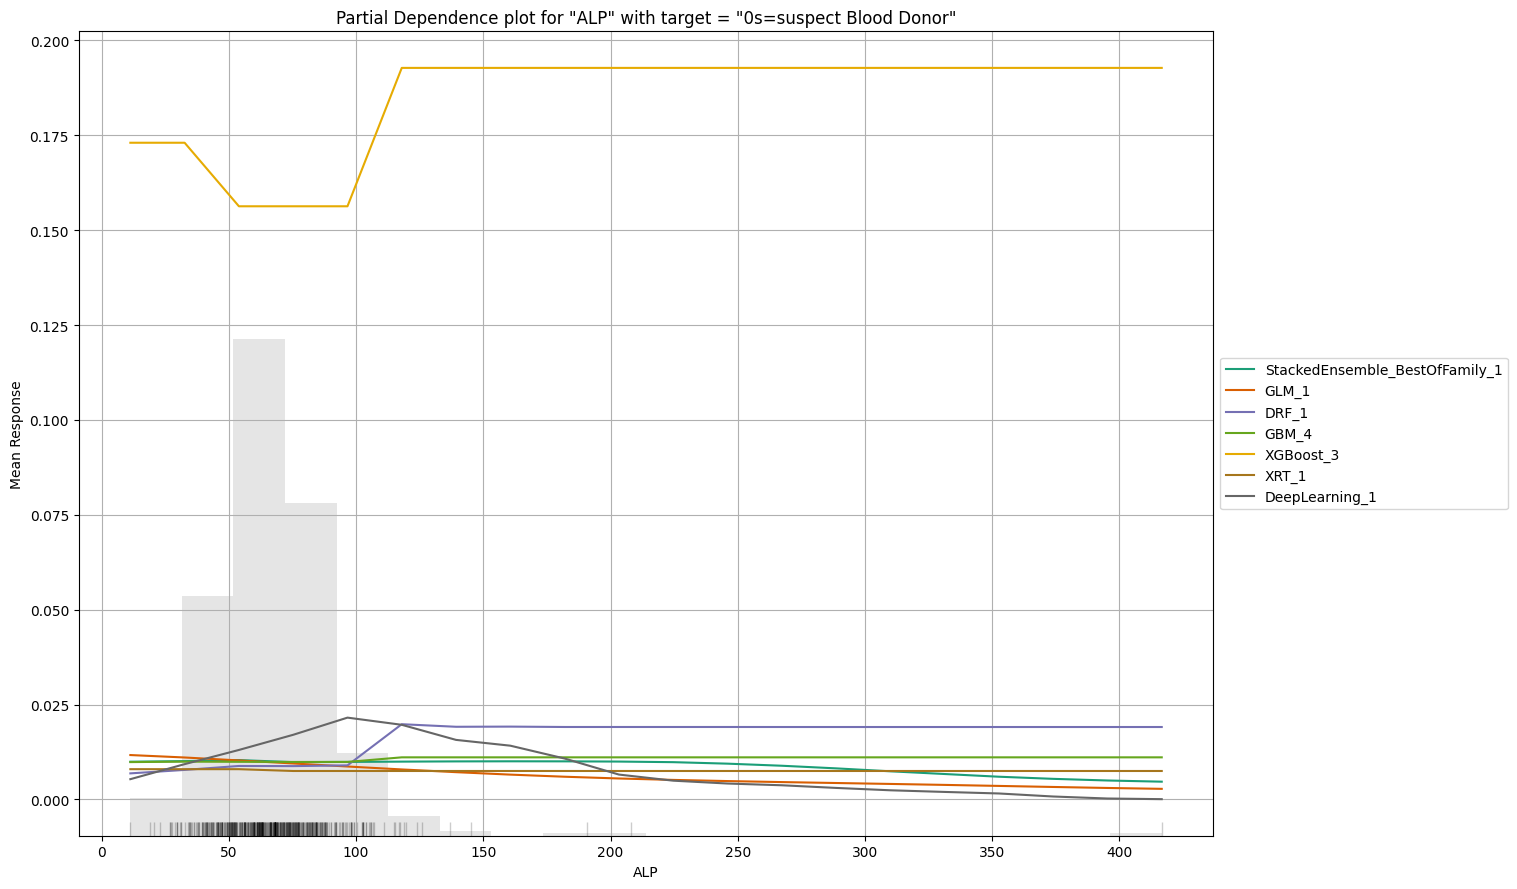

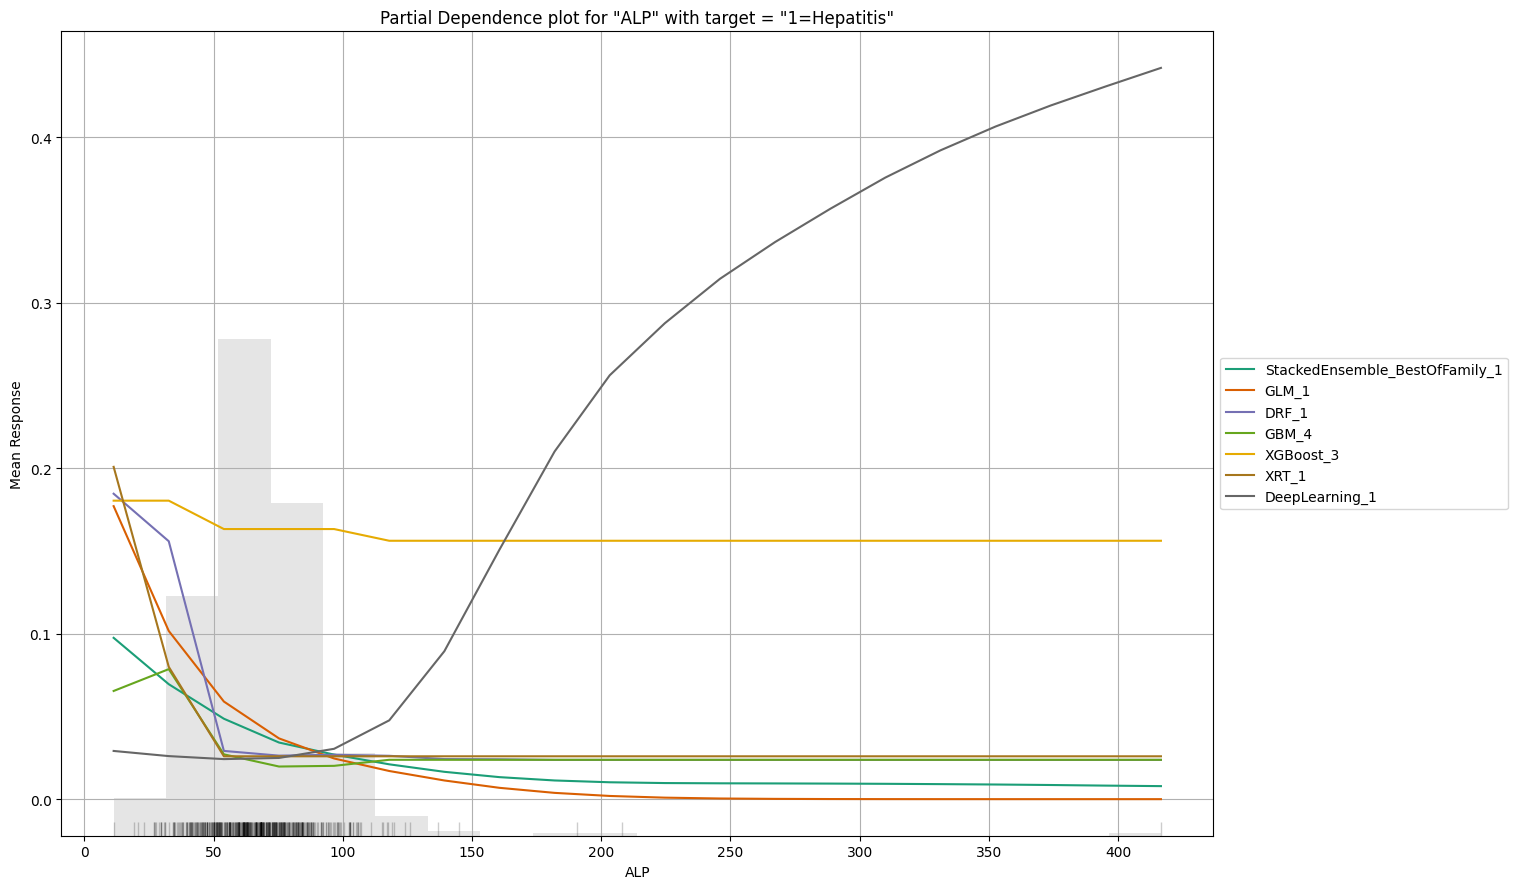

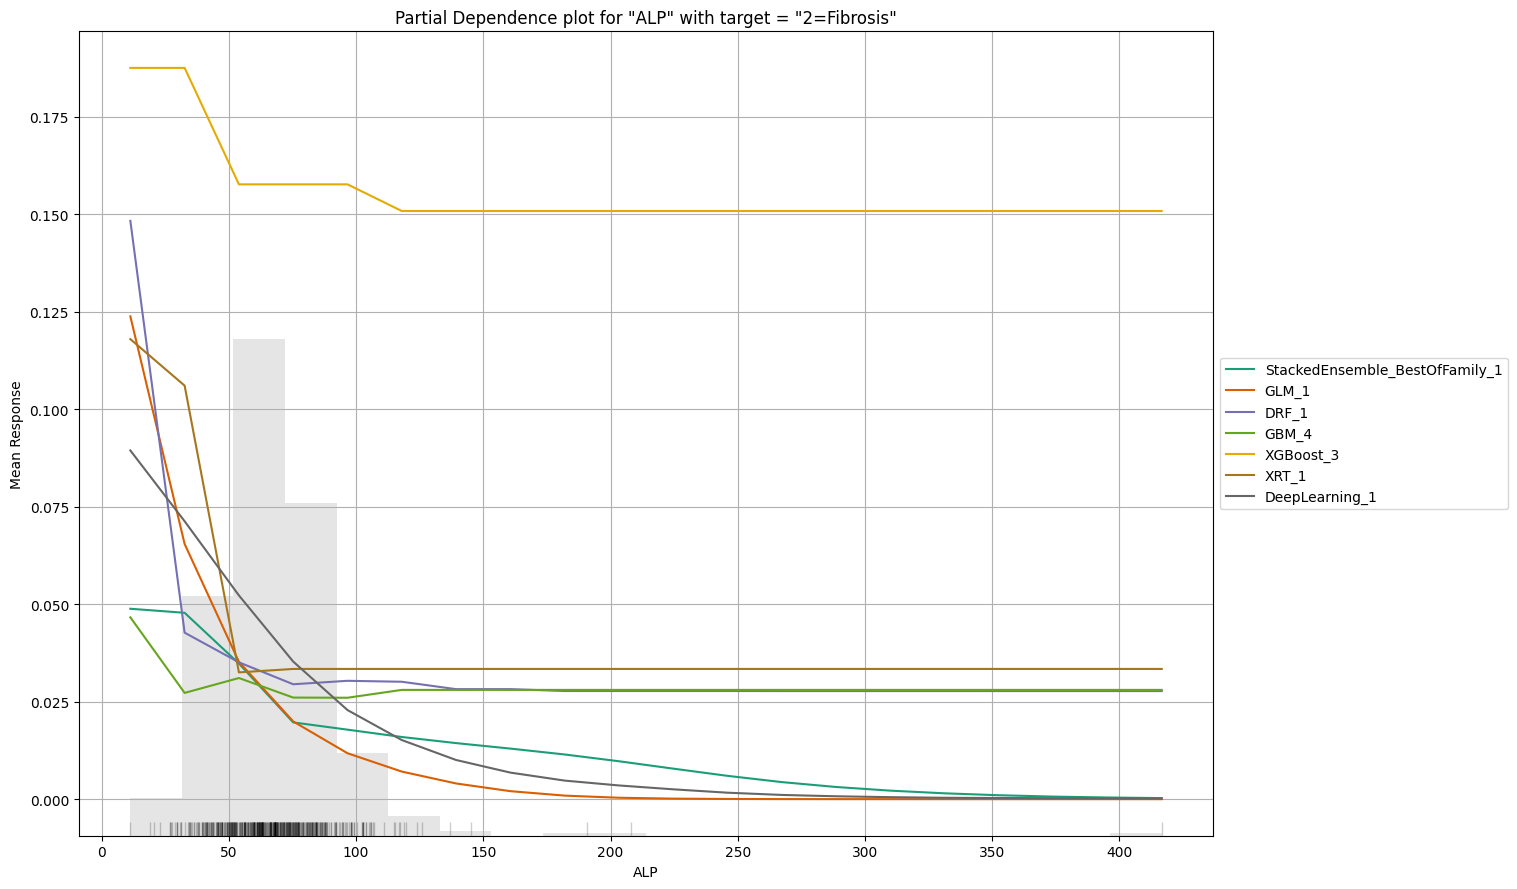

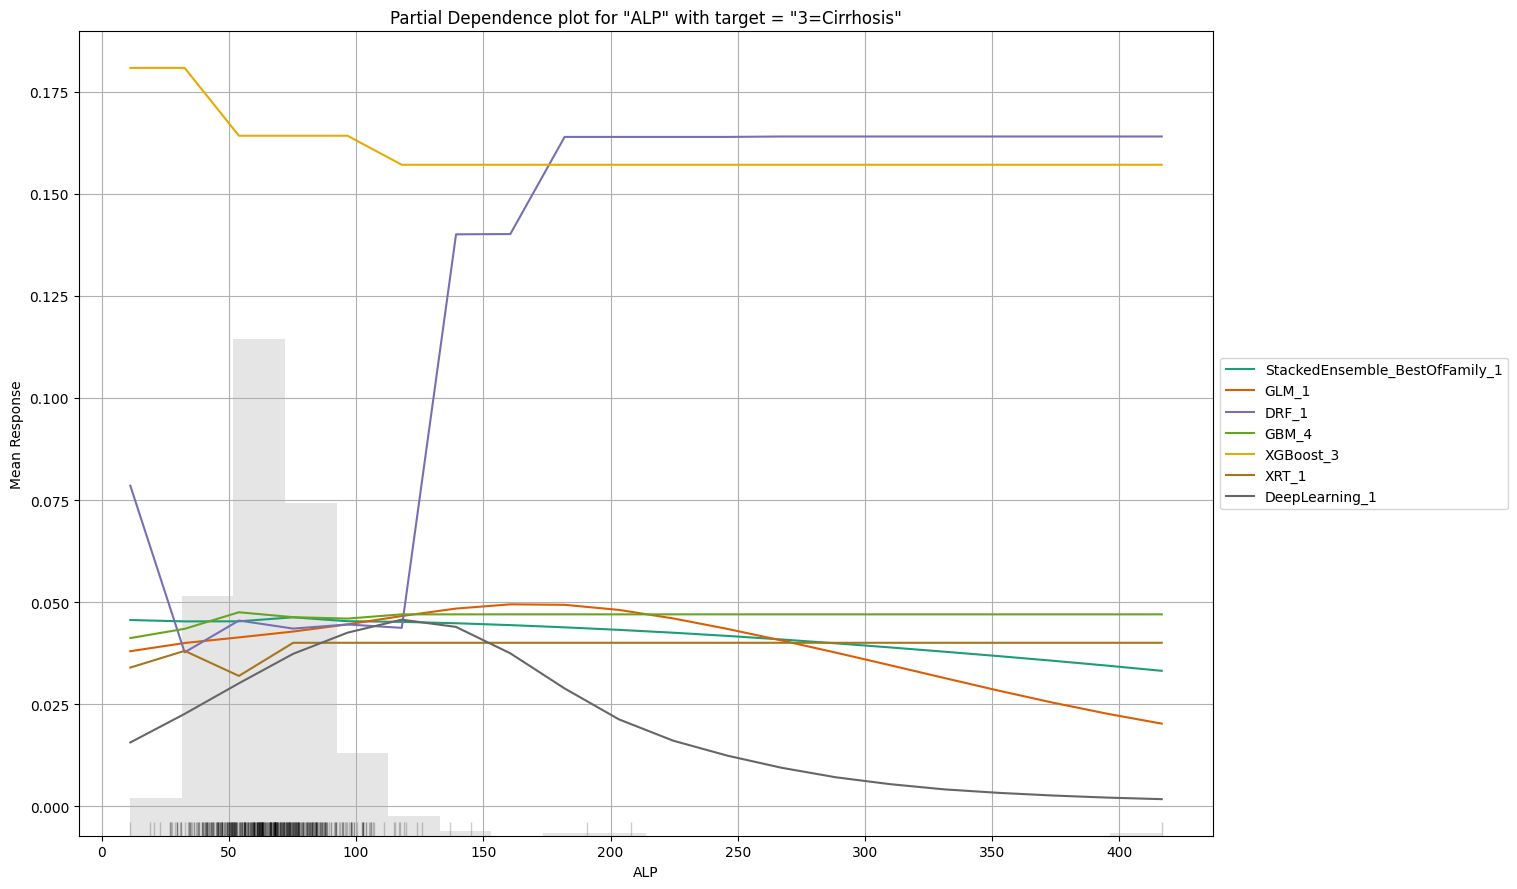

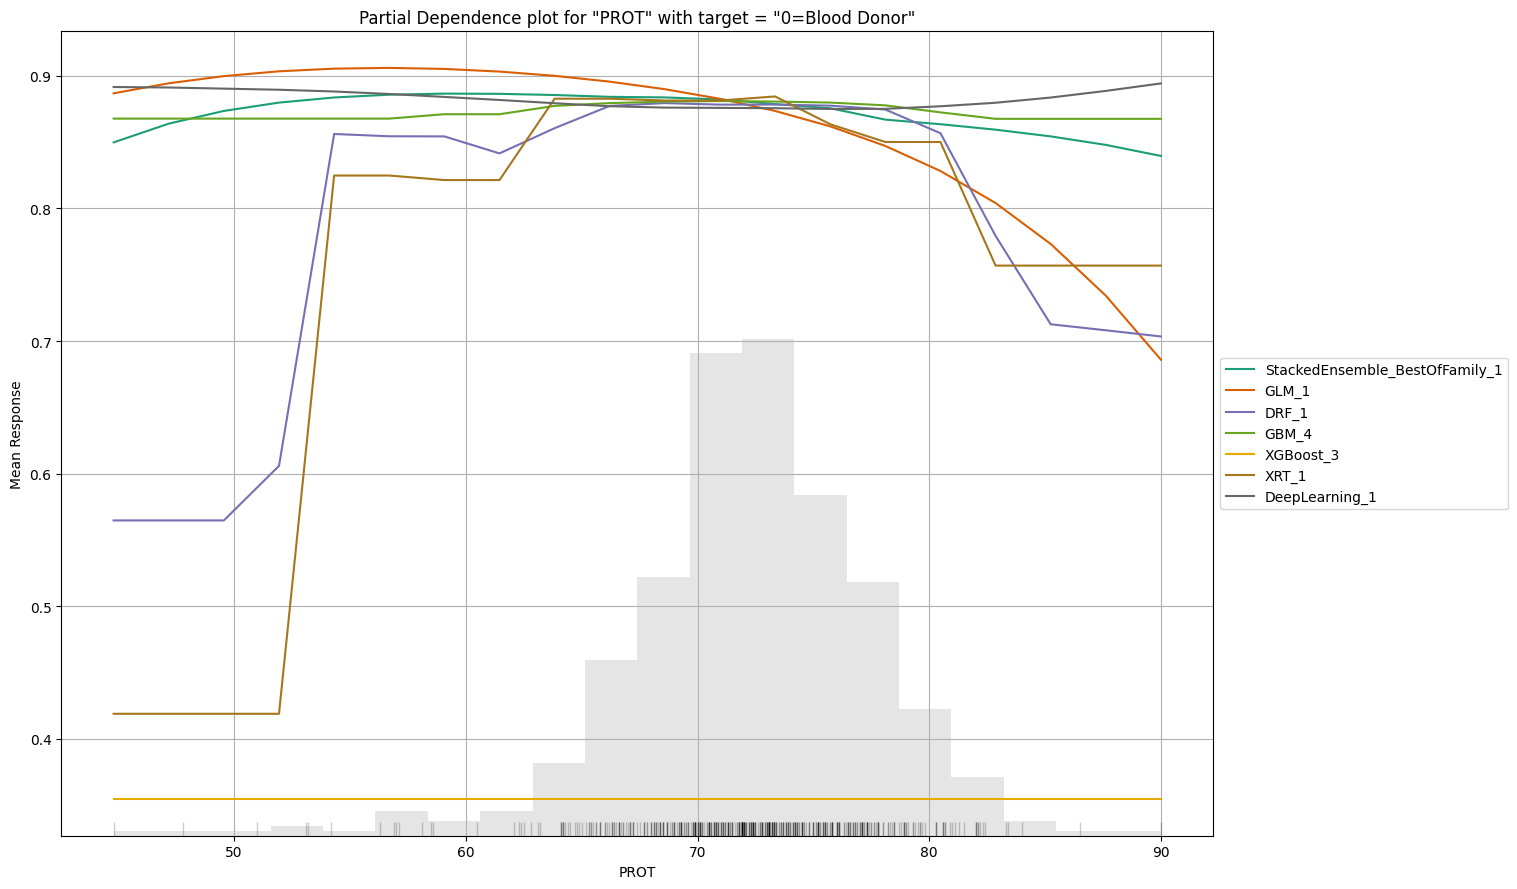

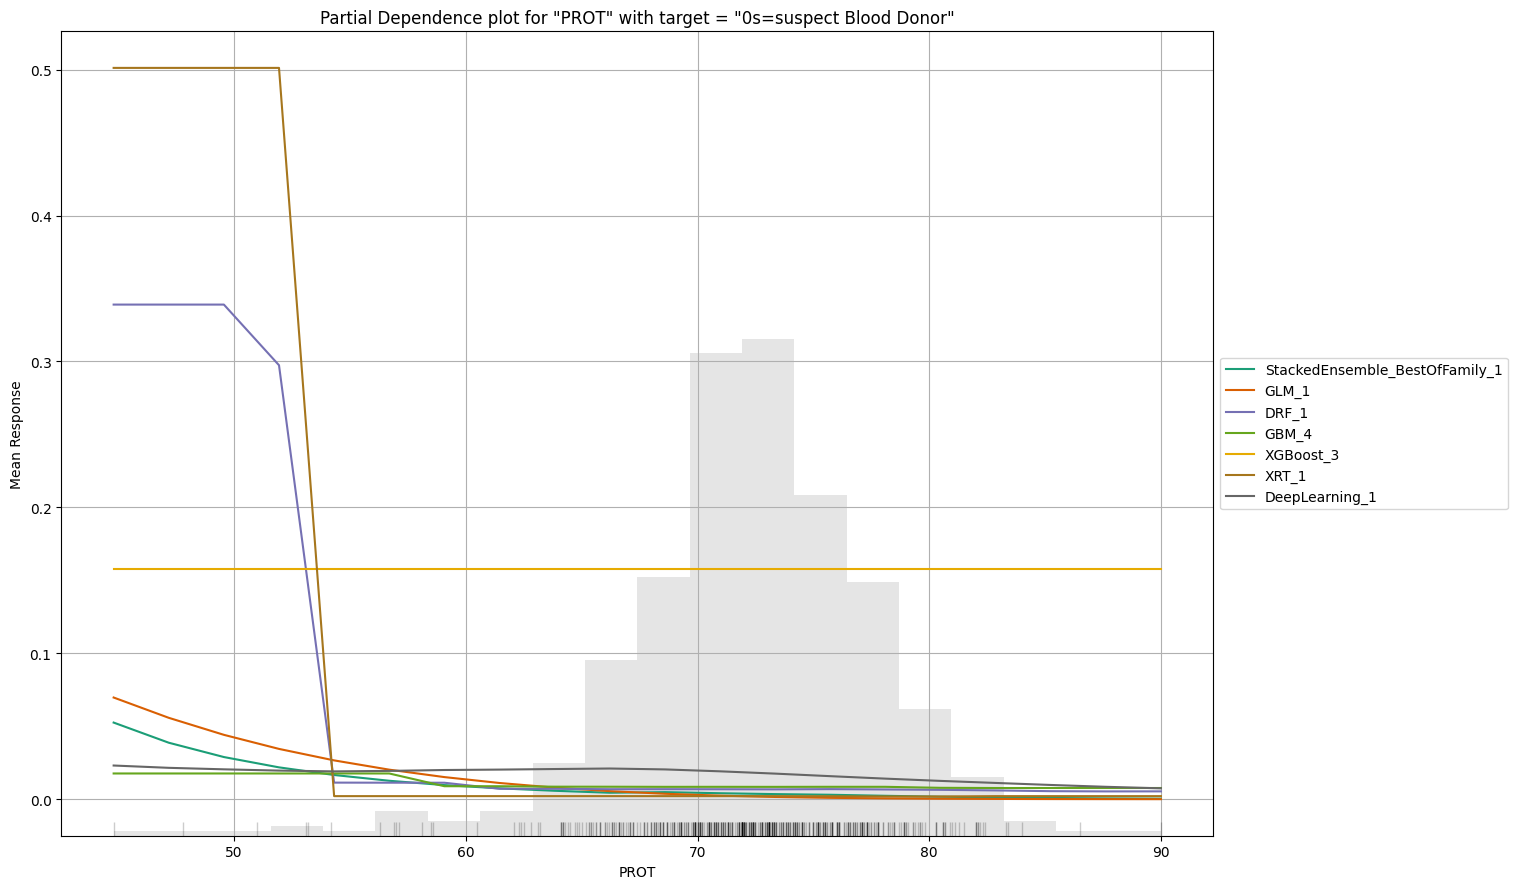

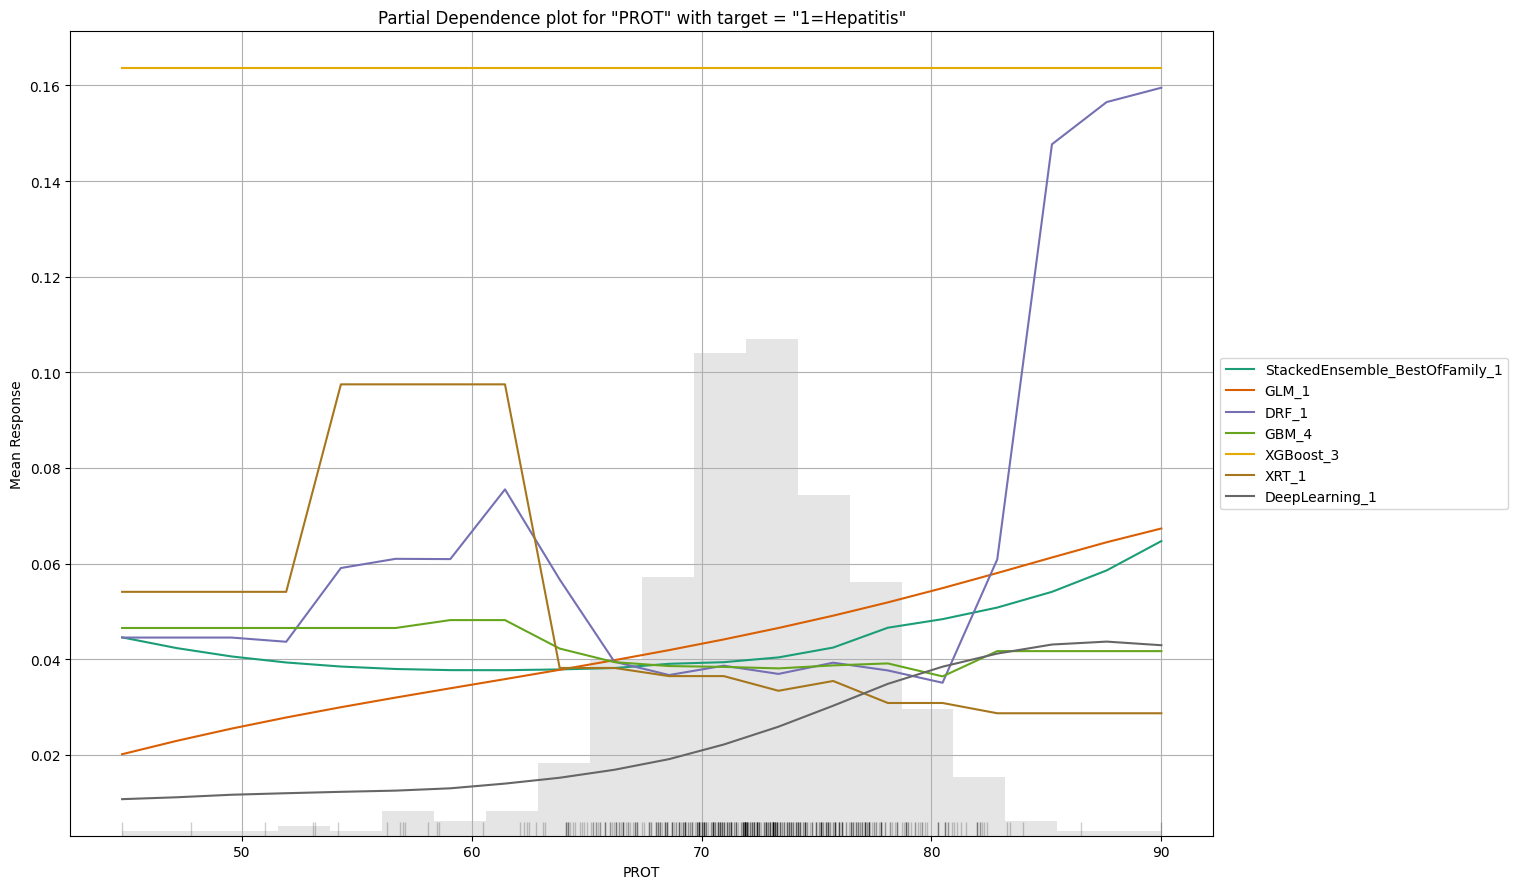

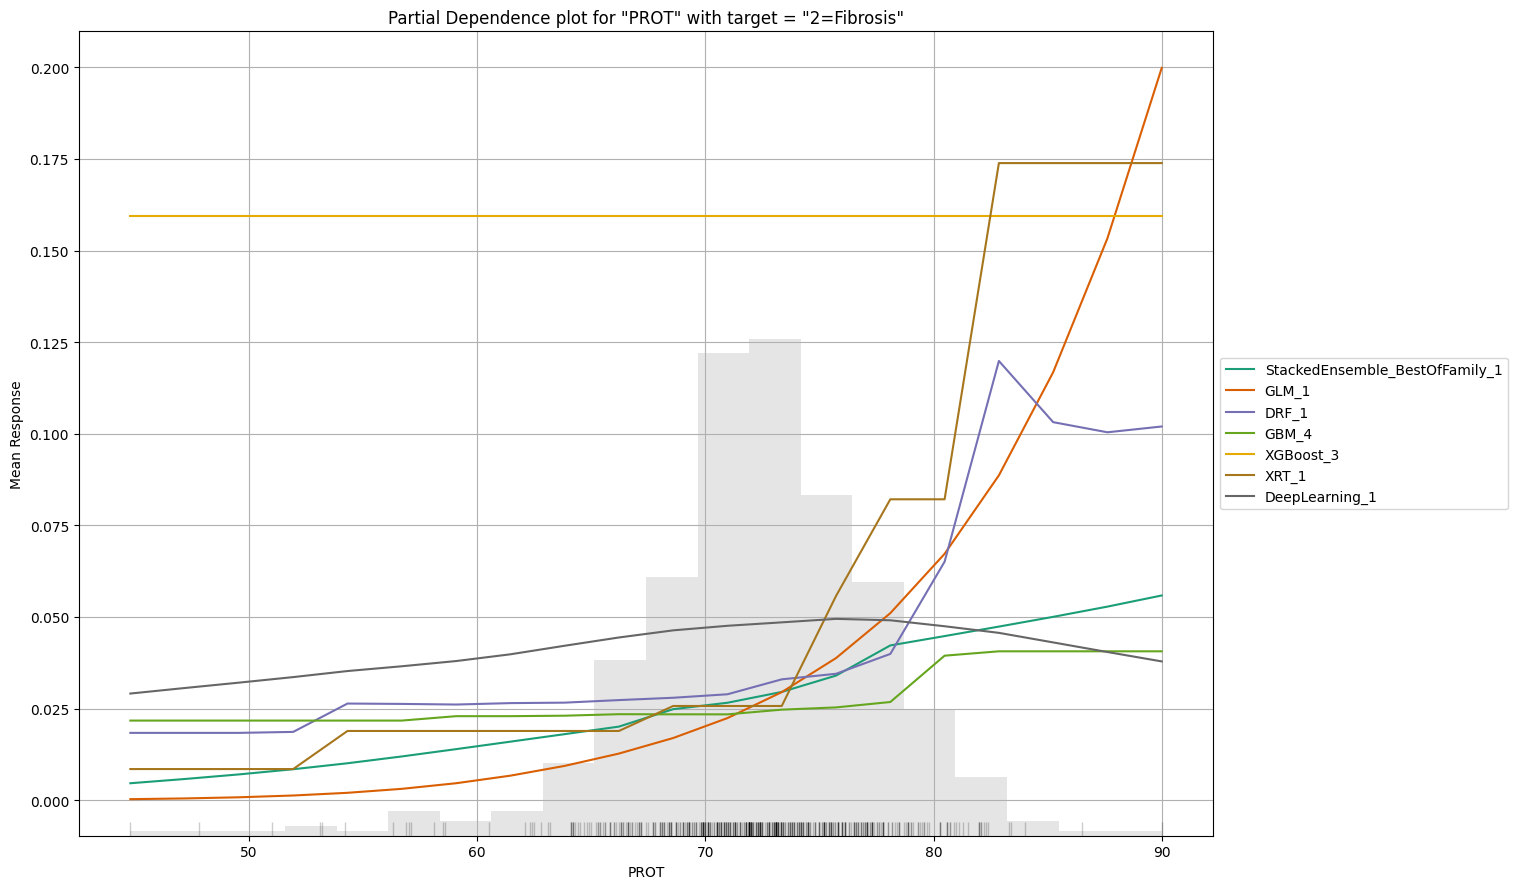

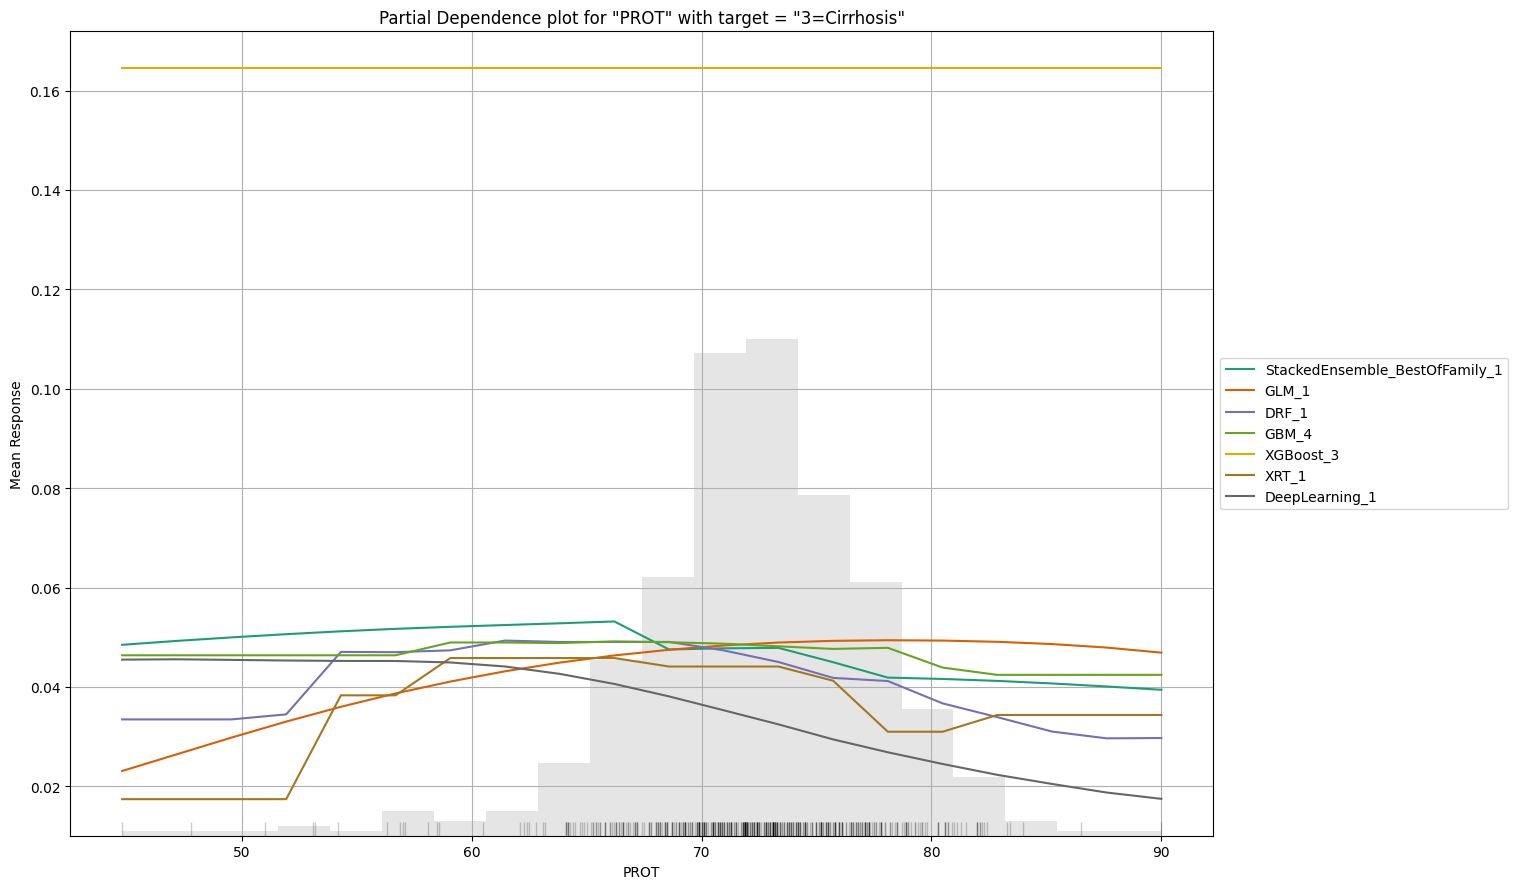

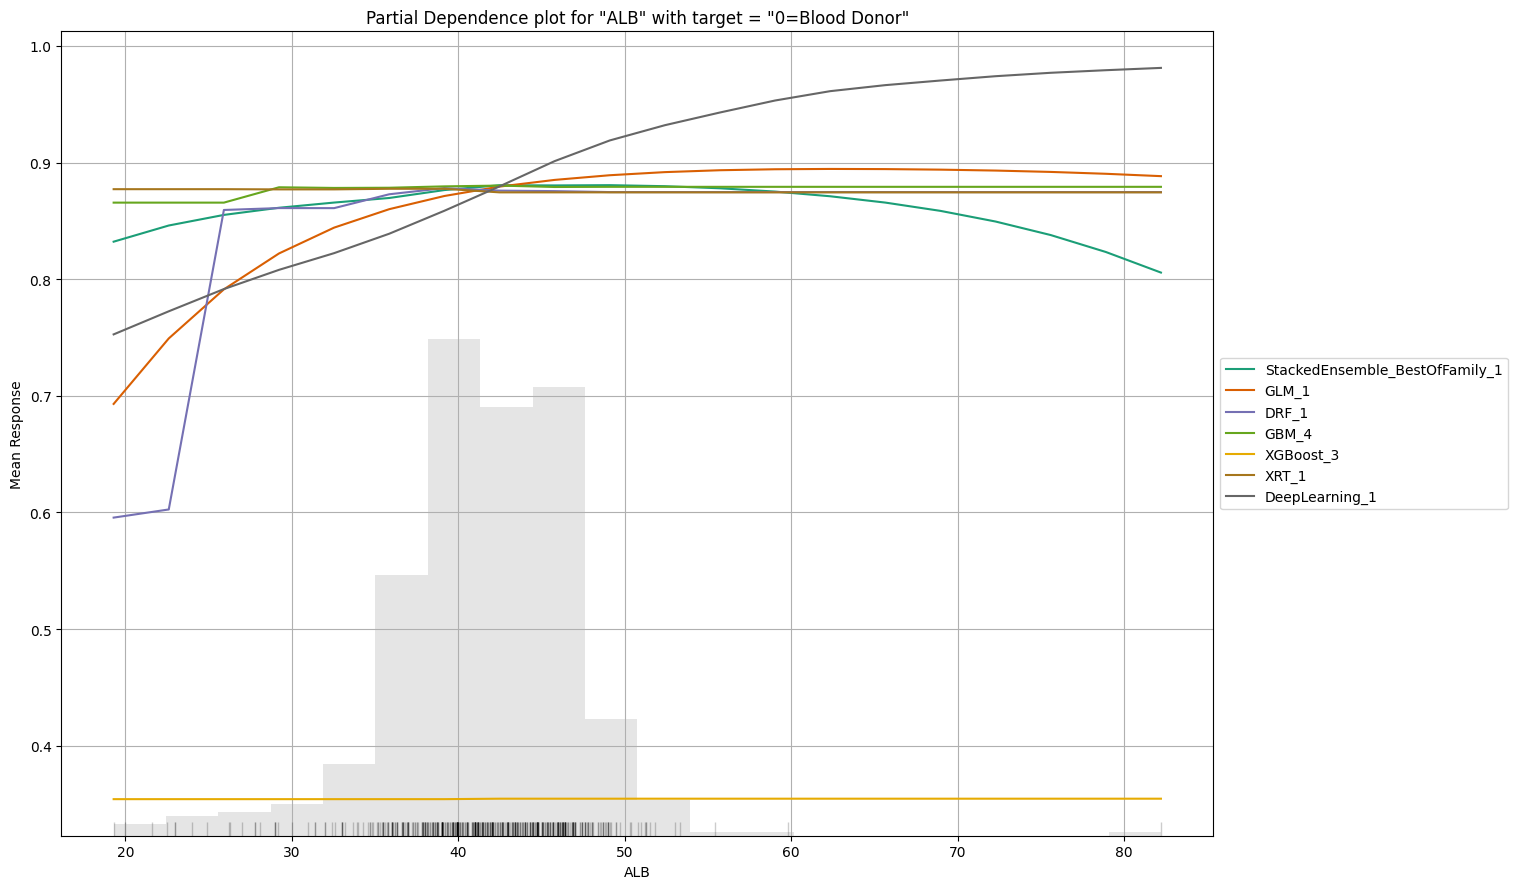

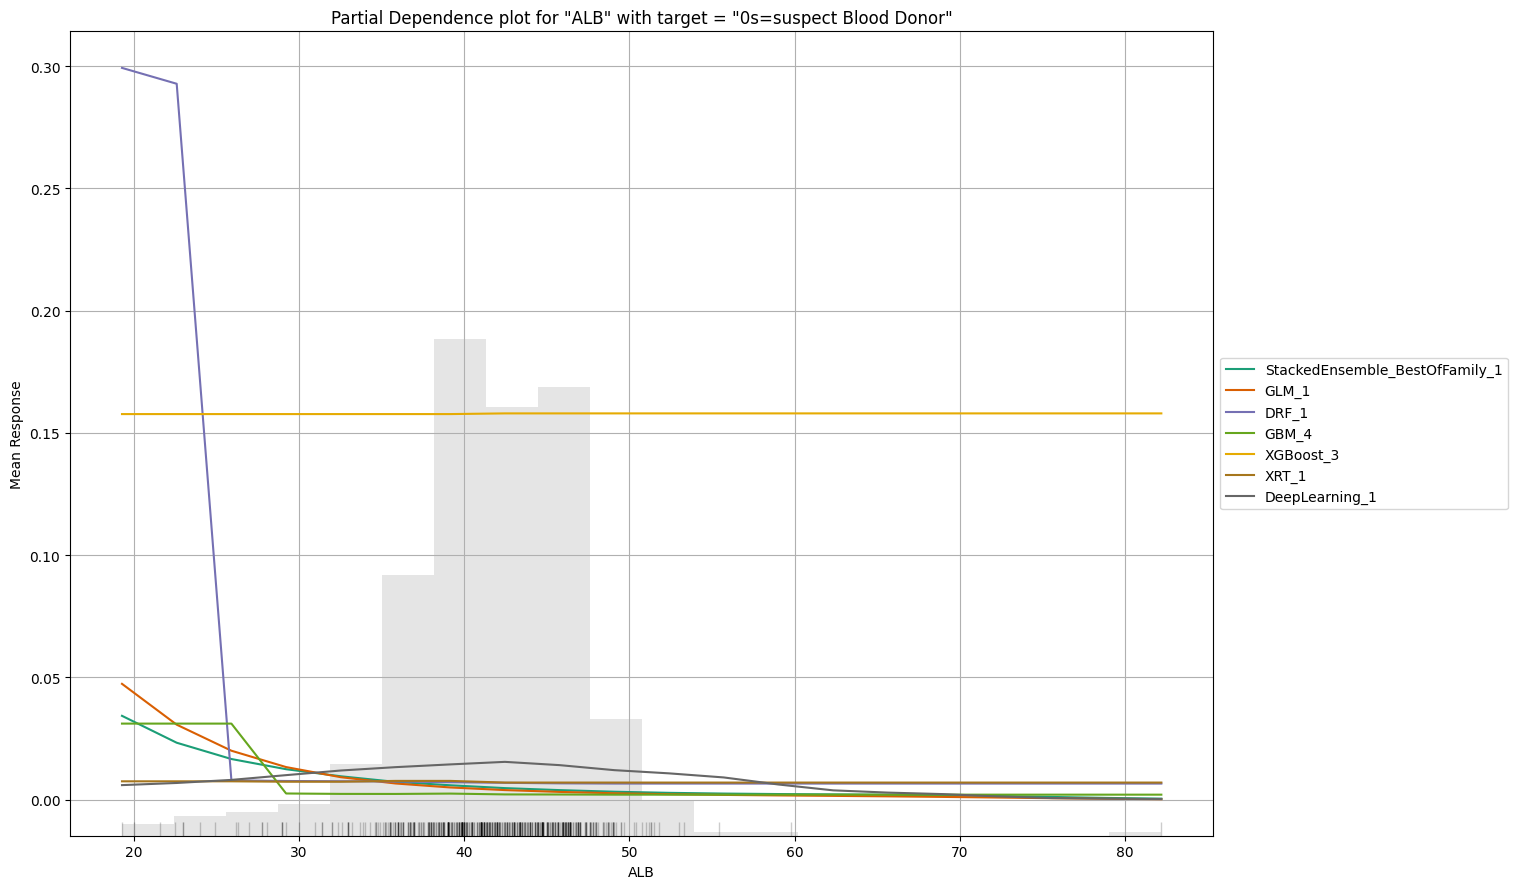

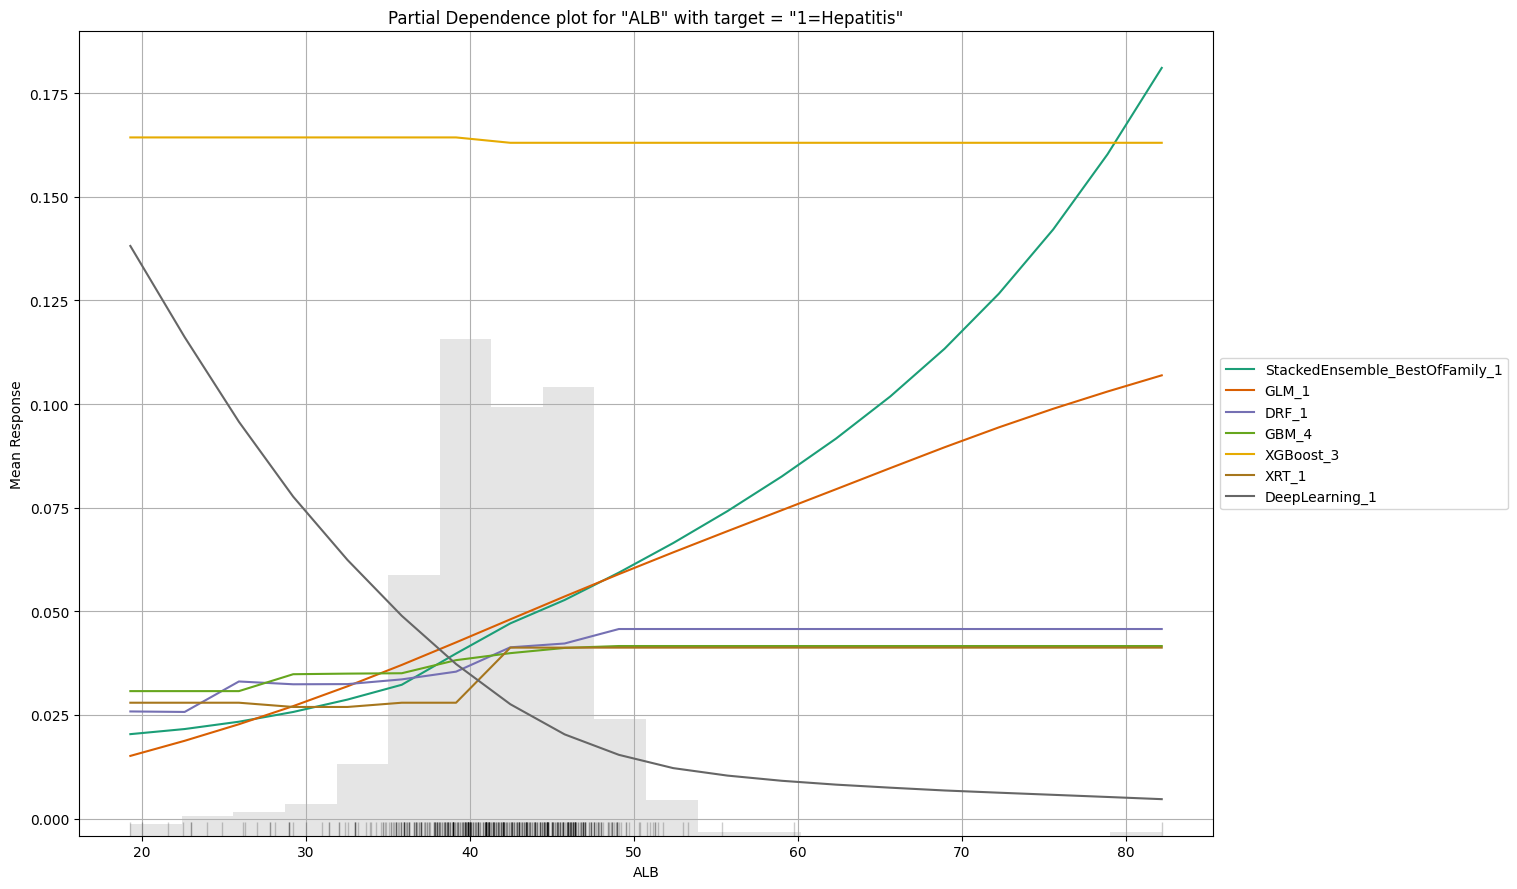

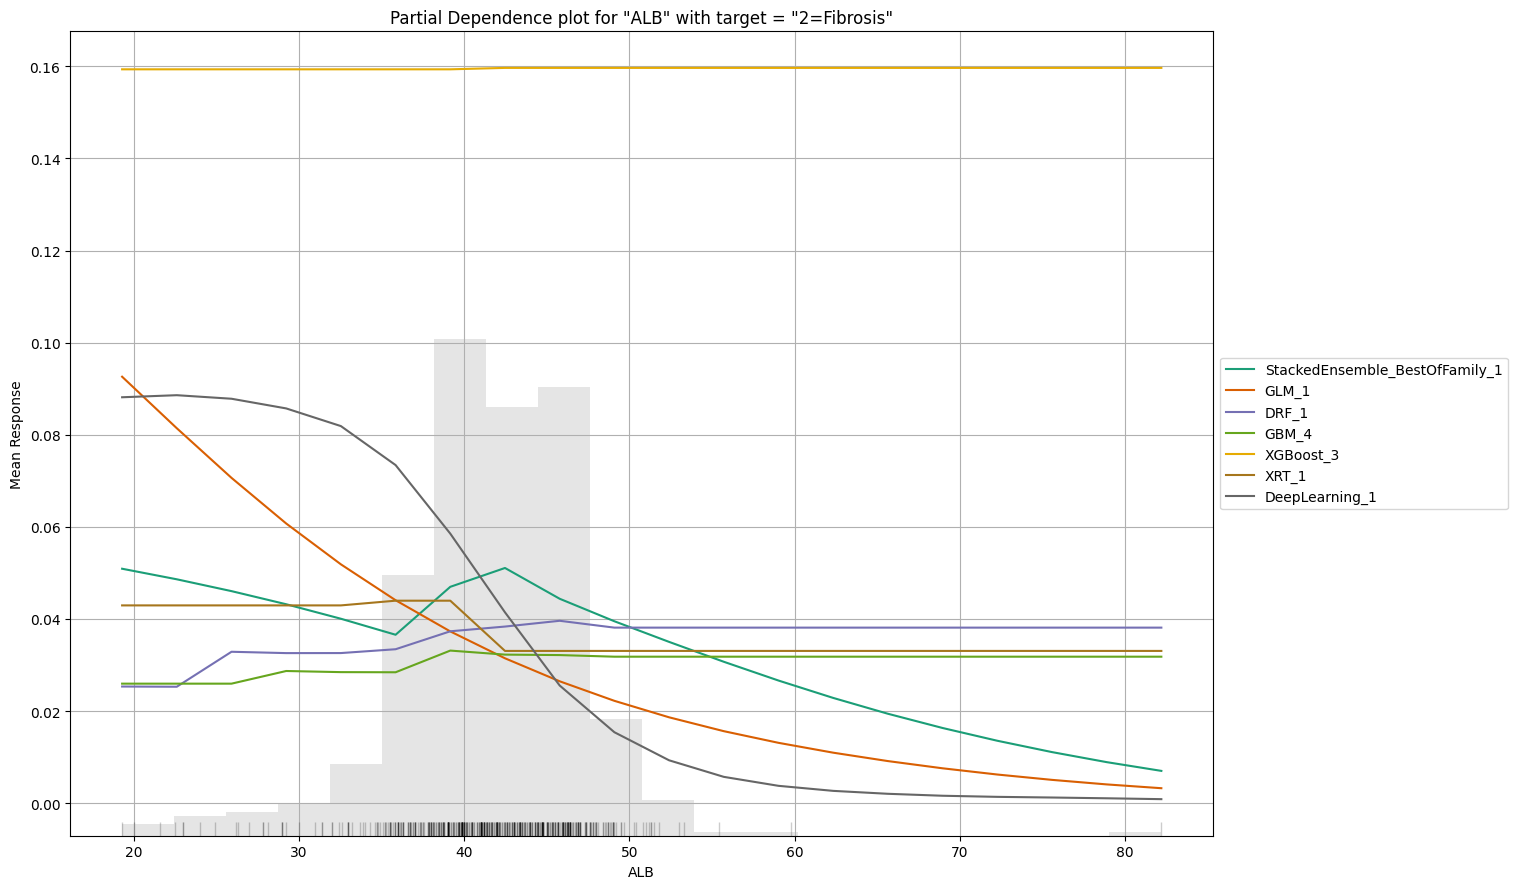

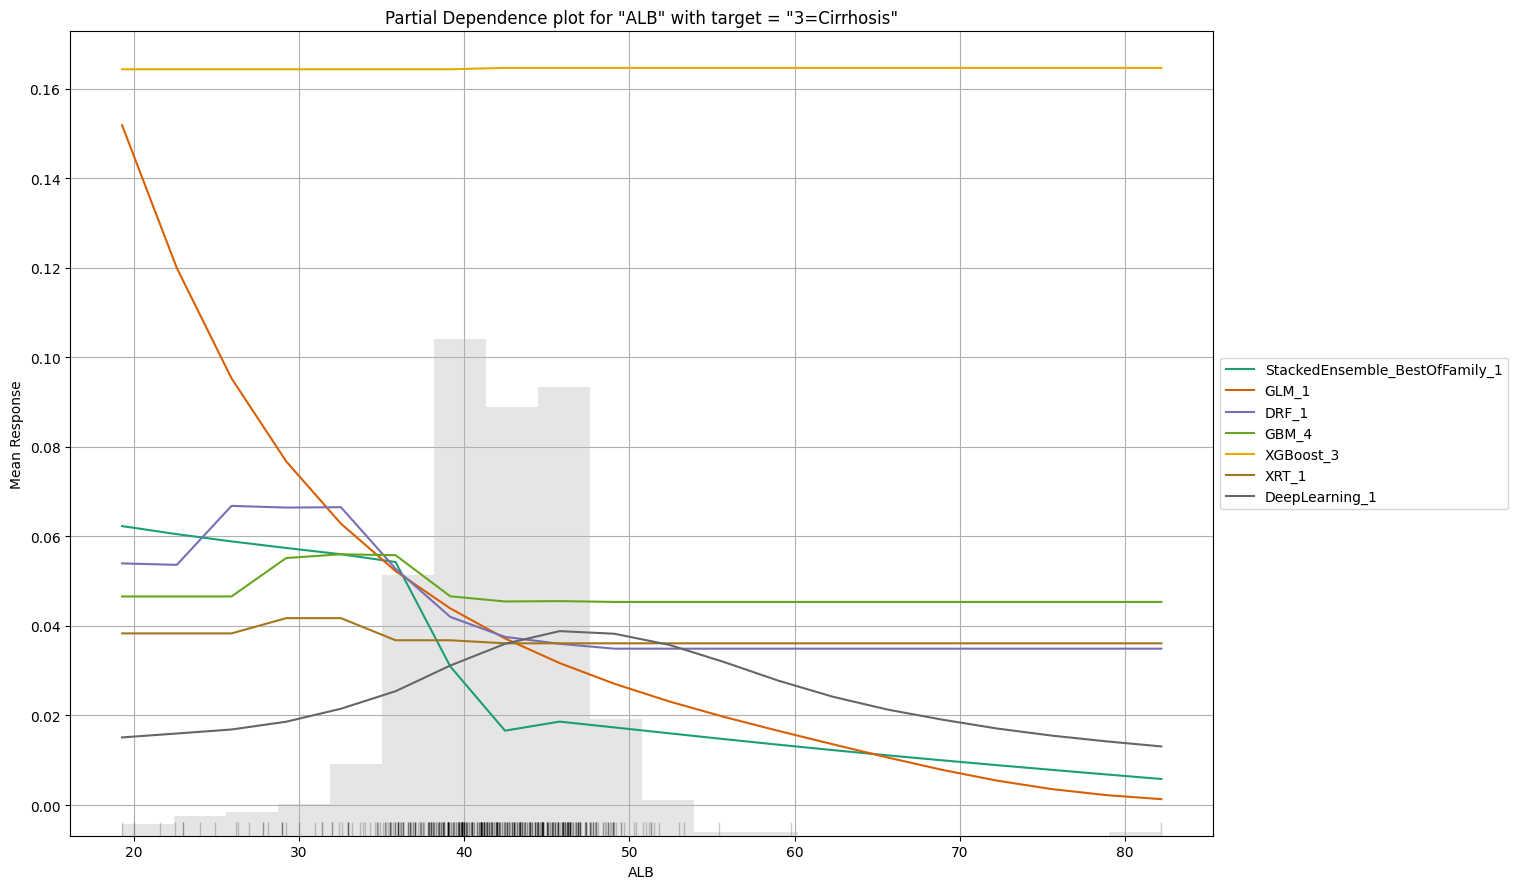

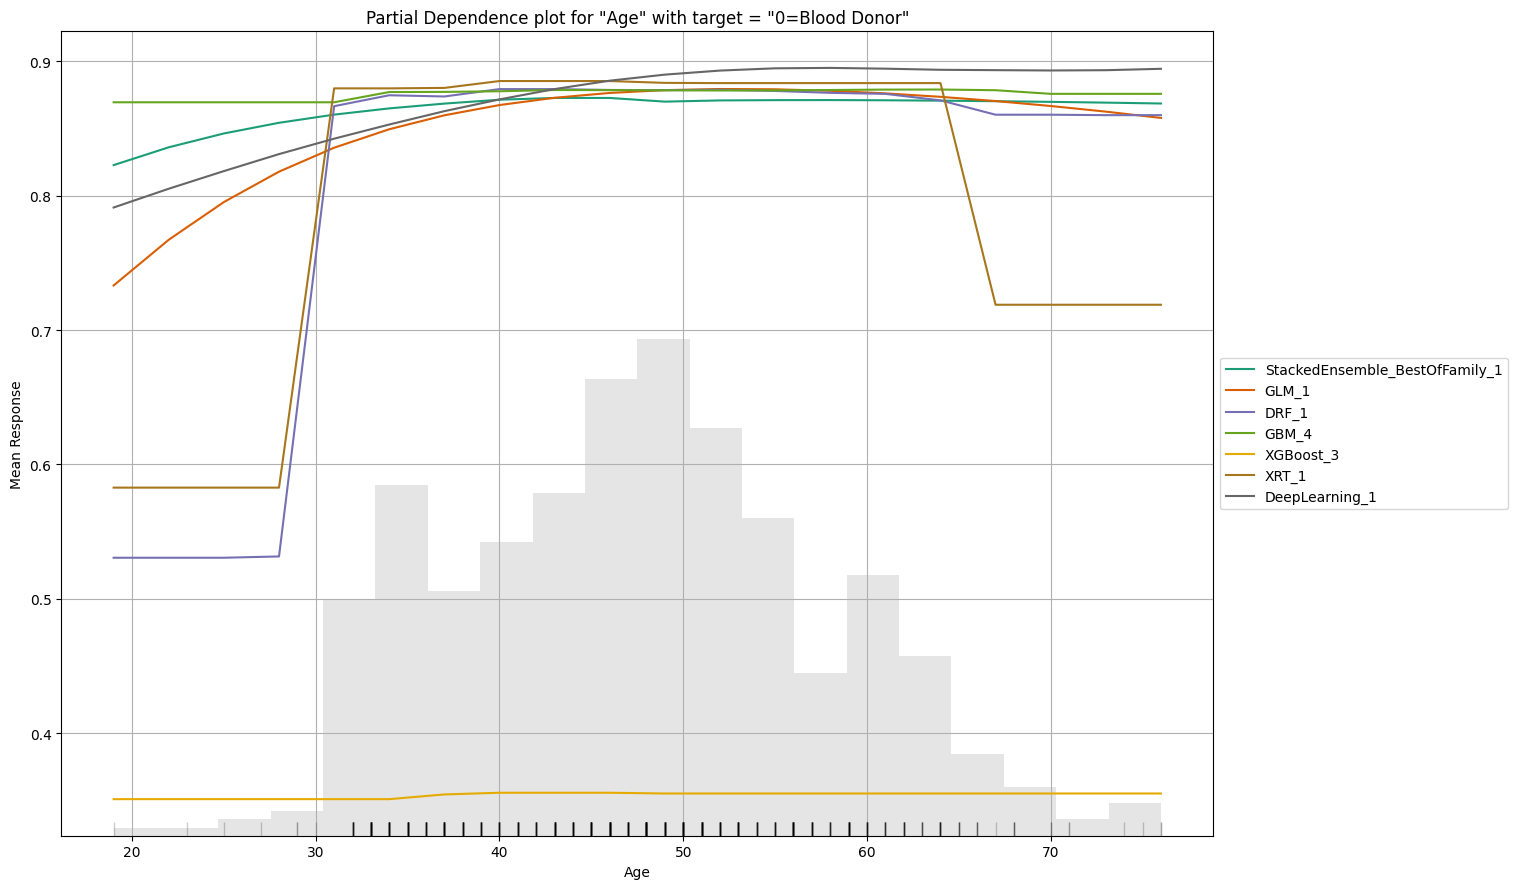

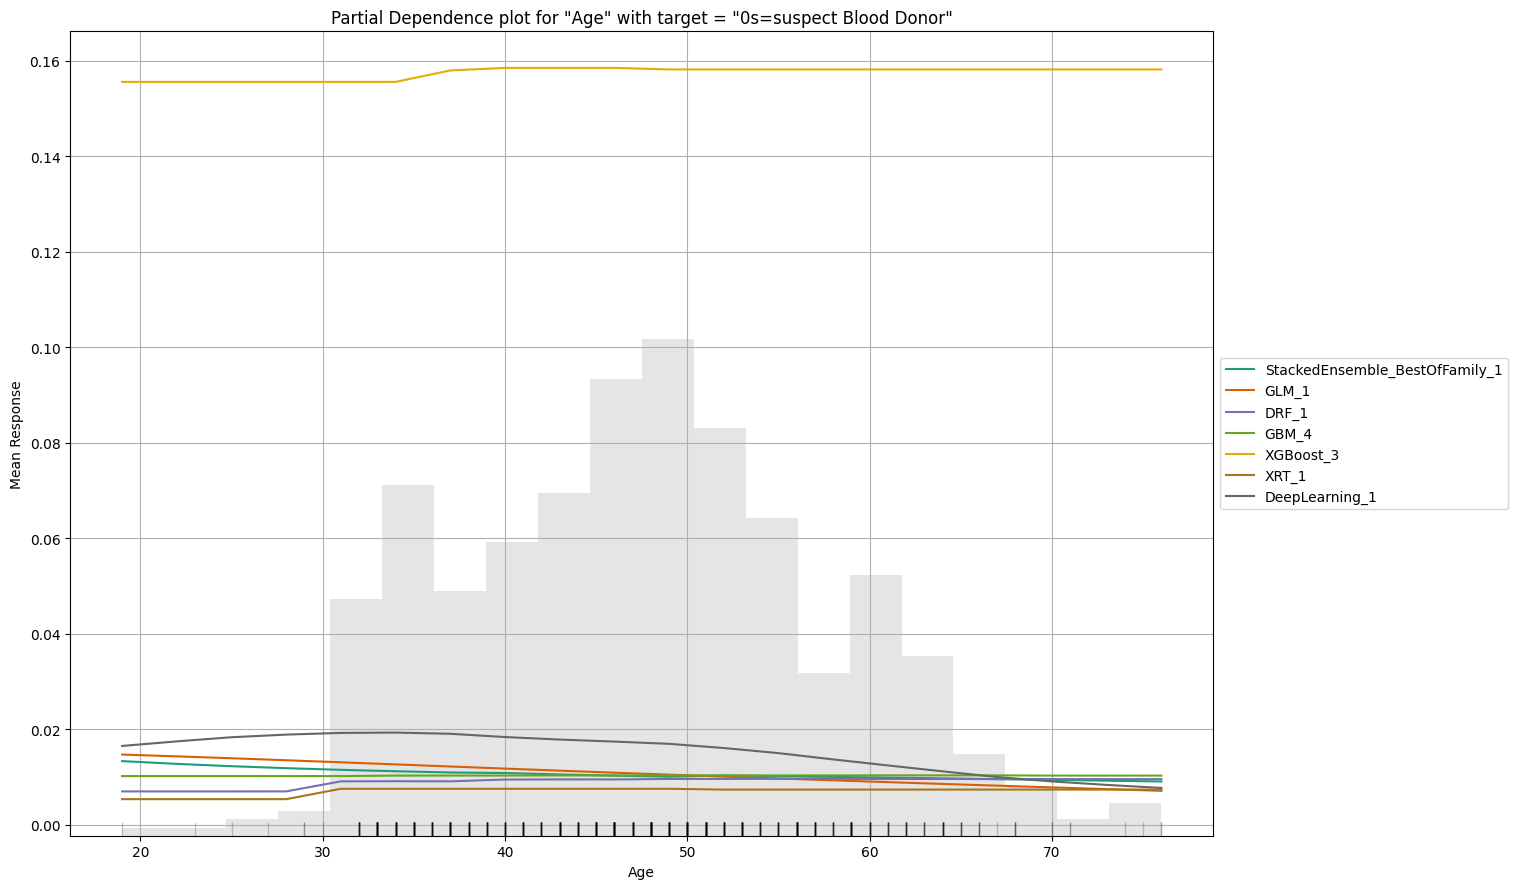

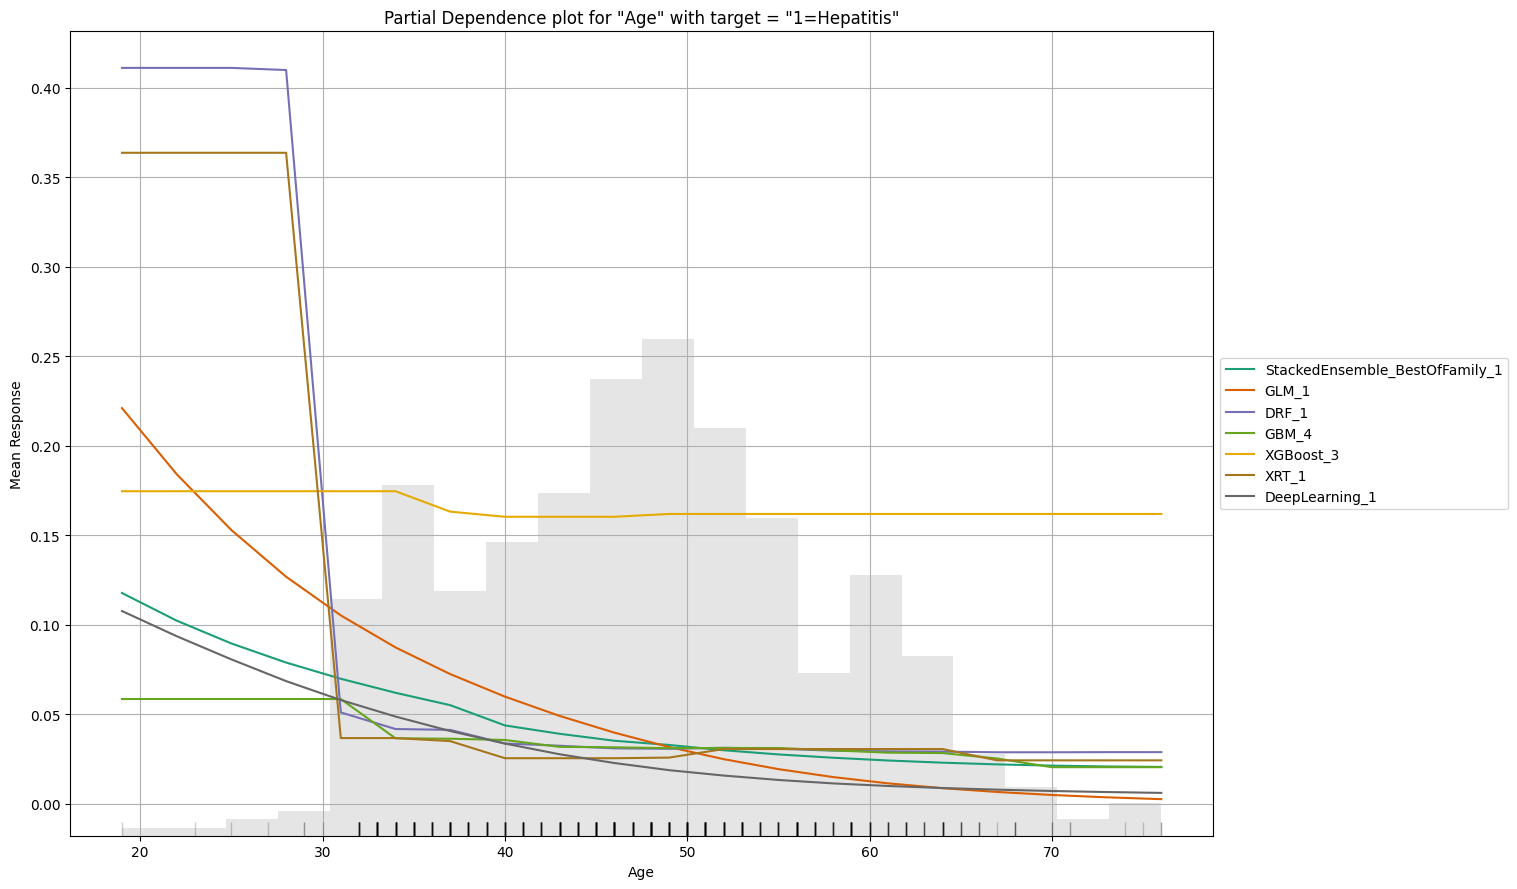

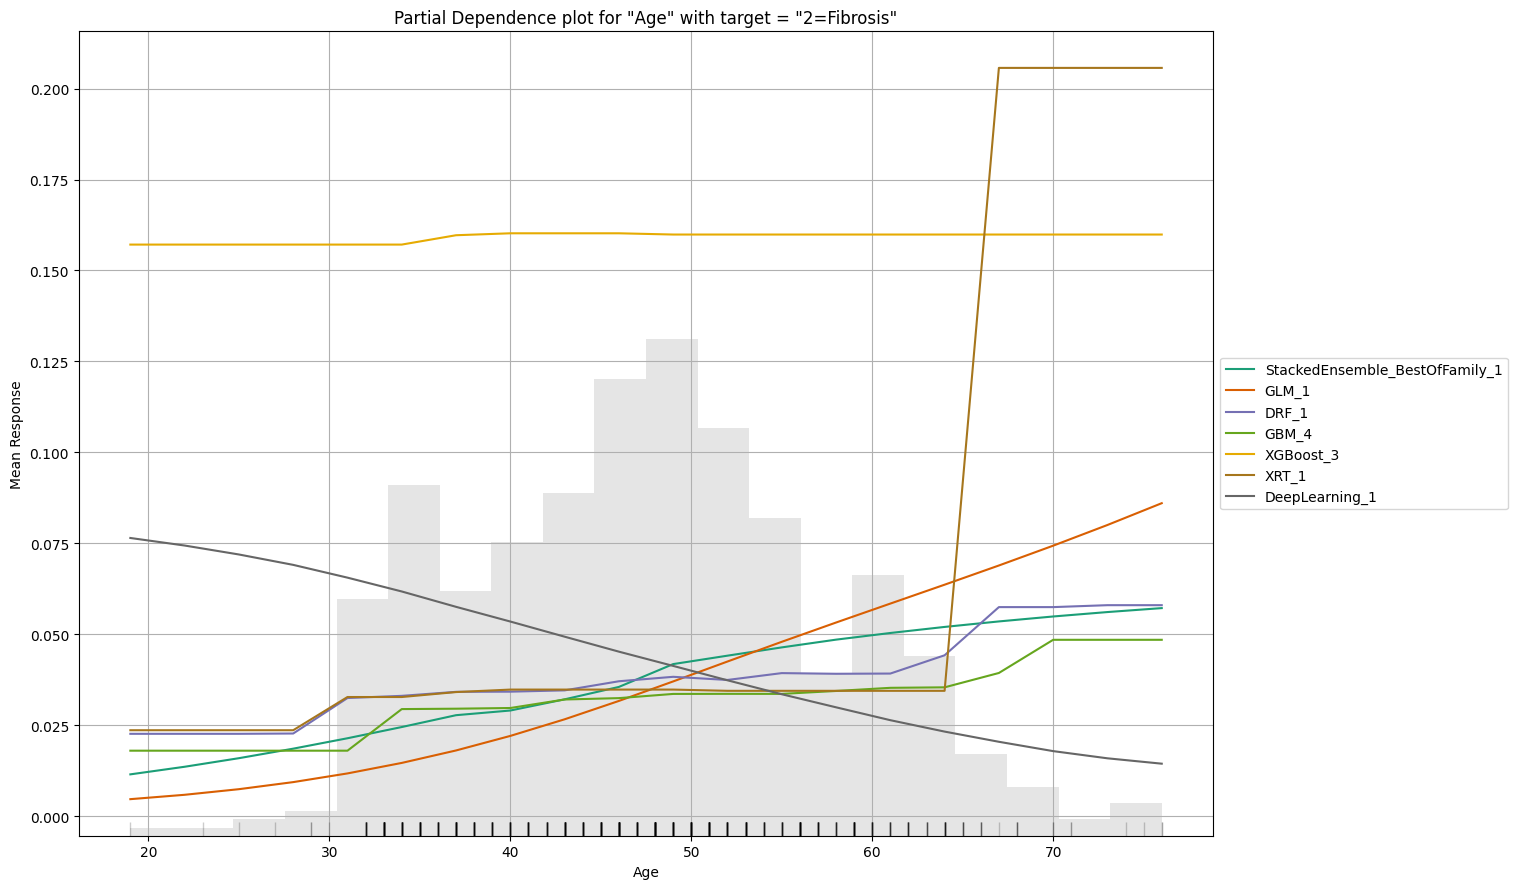

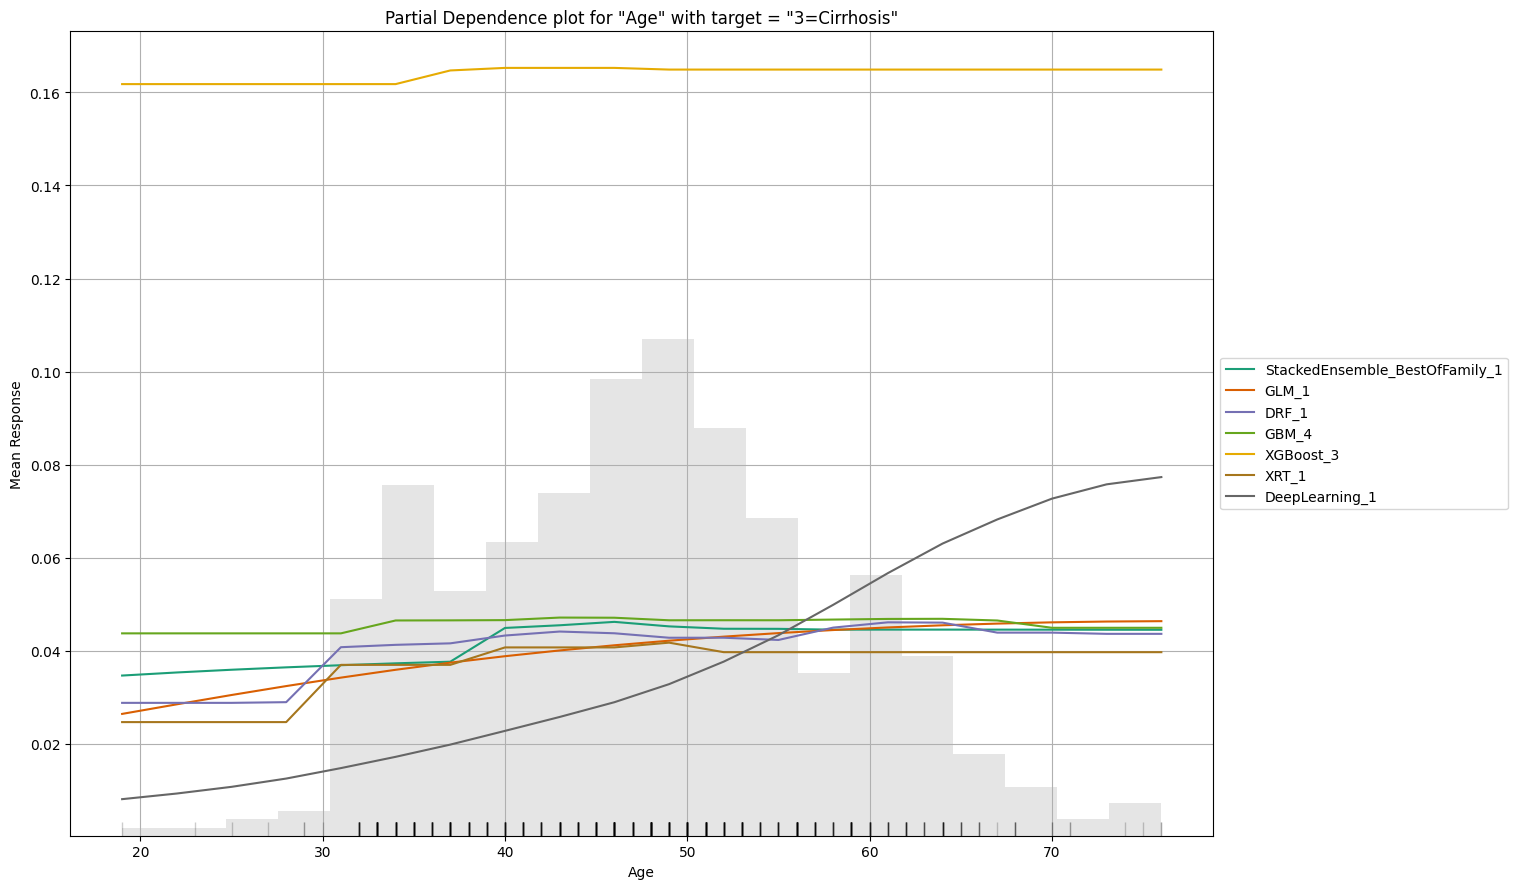

In [ ]:
exm = aml.explain(datasetAutoMLTest)

In [ ]:
aml.explain_row(datasetAutoMLTest, row_index=0)

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict          0=Blood Donor    0s=suspect Blood Donor    1=Hepatitis    2=Fibrosis    3=Cirrhosis
-------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------  -------------  ---------------  ------------------------  -------------  ------------  -------------
GBM_1_AutoML_1_20240317_122248                                        0.0731621  0.296848   0.144219  0.020799                15712                   3.75399   GBM              0=Blood Donor         1                      3.06929e-31    3.88532e-13   3.47406e-23    5.22447e-09
GBM_2_AutoML_1_20240317_122248                                        0.0817569  0.0710382  0.131047  0.0171732                1371                   0.098689  GBM              0=Blood Donor         0.991917               0.0003714      0.00614507    0.00098157     0.000585021
DRF_1_AutoML_1_20240317_122248                                        0.0822253  0.141362   0.148071  0.021925                  412                   0.045613  DRF              0=Blood Donor         0.999048               0.000951702    0             0              0
GBM_4_AutoML_1_20240317_122248                                        0.0917569  0.0860422  0.134885  0.018194                 1109                   0.175019  GBM              0=Blood Donor         0.996093               8.23934e-05    0.00335995    0.000248758    0.000215935
GBM_3_AutoML_1_20240317_122248                                        0.0917569  0.0872319  0.136062  0.0185129                 912                   0.221092  GBM              0=Blood Donor         0.999046               2.2396e-05     0.000710751   0.000142555    7.8099e-05
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_122248               0.129284   0.0983829  0.16353   0.0267421                7879                   2.10715   StackedEnsemble  0=Blood Donor         0.995685               0.00108428     0.00290899    0.00012254     0.00019923
GBM_5_AutoML_1_20240317_122248                                        0.14399    0.712976   0.507429  0.257485                  198                   0.010642  GBM              0=Blood Donor         0.505074               0.122891       0.126244      0.122901       0.12289
GLM_1_AutoML_1_20240317_122248                                        0.231861   0.159973   0.206185  0.0425123                 892                   0.003931  GLM              0=Blood Donor         0.969925               0.00150339     0.016069      0.00385345     0.00864928
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_122248               0.233842   0.170088   0.209542  0.043908                 4249                   0.52991   StackedEnsemble  0=Blood Donor         0.982902               0.000268968    0.014697      0.00213232     7.71995e-09
XRT_1_AutoML_1_20240317_122248                                        0.329956   0.89251    0.201146  0.0404596                 131                   0.007719  DRF              0=Blood Donor         1                      0              0             0              0
[16 rows x 14 columns]

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict          0=Blood Donor    0s=suspect Blood Donor    1=Hepatitis    2=Fibrosis    3=Cirrhosis
-------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------  -------------  ---------------  ------------------------  -------------  ------------  -------------
GBM_1_AutoML_1_20240317_122248                                        0.0731621  0.296848   0.144219  0.020799                15712                   3.75399   GBM              0=Blood Donor         1                      3.06929e-31    3.88532e-13   3.47406e-23    5.22447e-09
GBM_2_AutoML_1_20240317_122248                                        0.0817569  0.0710382  0.131047  0.0171732                1371                   0.098689  GBM              0=Blood Donor         0.991917               0.0003714      0.00614507    0.00098157     0.000585021
DRF_1_AutoML_1_20240317_122248                                        0.0822253  0.141362   0.148071  0.021925                  412                   0.045613  DRF              0=Blood Donor         0.999048               0.000951702    0             0              0
GBM_4_AutoML_1_20240317_122248                                        0.0917569  0.0860422  0.134885  0.018194                 1109                   0.175019  GBM              0=Blood Donor         0.996093               8.23934e-05    0.00335995    0.000248758    0.000215935
GBM_3_AutoML_1_20240317_122248                                        0.0917569  0.0872319  0.136062  0.0185129                 912                   0.221092  GBM              0=Blood Donor         0.999046               2.2396e-05     0.000710751   0.000142555    7.8099e-05
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_122248               0.129284   0.0983829  0.16353   0.0267421                7879                   2.10715   StackedEnsemble  0=Blood Donor         0.995685               0.00108428     0.00290899    0.00012254     0.00019923
GBM_5_AutoML_1_20240317_122248                                        0.14399    0.712976   0.507429  0.257485                  198                   0.010642  GBM              0=Blood Donor         0.505074               0.122891       0.126244      0.122901       0.12289
GLM_1_AutoML_1_20240317_122248                                        0.231861   0.159973   0.206185  0.0425123                 892                   0.003931  GLM              0=Blood Donor         0.969925               0.00150339     0.016069      0.00385345     0.00864928
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_122248               0.233842   0.170088   0.209542  0.043908                 4249                   0.52991   StackedEnsemble  0=Blood Donor         0.982902               0.000268968    0.014697      0.00213232     7.71995e-09
XRT_1_AutoML_1_20240317_122248                                        0.329956   0.89251    0.201146  0.0404596                 131                   0.007719  DRF              0=Blood Donor         1                      0              0             0              0
[16 rows x 14 columns]

### LIME (Local Interpretation Model-Agnostic Explanation) Analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1893298ed21f29db17dd6f10952f35e163d5ecb6c1719fe9dbf7ac742e99325b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

### Linear Model

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_1), feature_names=x_train_1.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test_l)
np_y_test = np.array(y_test_l)
print("Prediction : ", lin_reg.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], lin_reg.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [0.16177803]
Actual :      0


In [ ]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook

### Tree Based Model

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_1), feature_names=x_train_1.columns, mode="classification"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test_l)
np_y_test = np.array(y_test_l)
print("Prediction : ", DTree.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], DTree.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [0.01864802]
Actual :      0


In [ ]:

lime_tree_explanation.show_in_notebook()

### CONCLUSION
Unlike LIME, SHAP does not construct a specific interpretable model for a local region but rather utilizes the black-box model directly to compute the contribution of each feature to the prediction. It employs the game theory concept of Shapley values to determine feature importance. This approach enhances stability and avoids assumptions of local linear models, making SHAP an improvement over LIME.

SHAP quantifies the contribution of each variable to the prediction, while LIME offers a simplified version by focusing on the local region around a specific data point to understand variable contributions to the output.

When choosing an interpretable method for a machine learning model, it's essential to assess our requirements and consider the tradeoffs between interpretability and model complexity to select the most suitable approach.